# B. PYTHON CODE

## GROUP 4 FINAL PROJECT - ONLINE SHOPPER INTENTIONS

### **IMPORTING THE REQUIRED FUNCTIONS INTO THE JUPYTER NOTEBOOK**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas                   as      pd
import numpy                    as      np
import sklearn.datasets         as      datasets
import seaborn as sns
import matplotlib.pyplot        as      plt
import time
from datetime import timedelta
import statsmodels.api   as  sm
import sys, os
import pandas_profiling

from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.neighbors        import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

from sklearn.model_selection import GridSearchCV
from   sklearn.tree             import _tree

from   sklearn                  import  metrics 
from   sklearn.metrics          import  classification_report
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  roc_curve, auc
from sklearn.metrics import roc_auc_score
from   sklearn.model_selection  import  KFold 
from   sklearn.model_selection import  cross_val_score

from   sklearn.model_selection  import train_test_split

from   sklearn.model_selection import  cross_val_score


import pydotplus

%matplotlib inline


In [2]:


from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc

### READING THE DATASET

In [3]:
data = pd.read_csv('online_shoppers_intention.csv')

In [4]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [5]:
data.shape

(12330, 18)

### EXPLORATORY DATA ANALYSIS(EDA) 

**DONE ON THE DATASET ONLINE SHOPPER INTENTIONS**

In [6]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
feature_names   = data.columns
print(feature_names)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [9]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Data Viualization

In [11]:
data["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

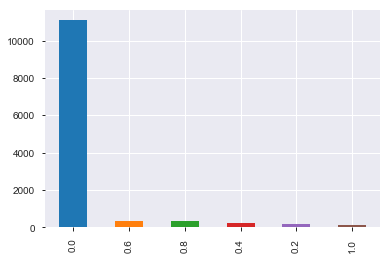

In [12]:
a=data["SpecialDay"].value_counts()
a.plot(kind='bar')

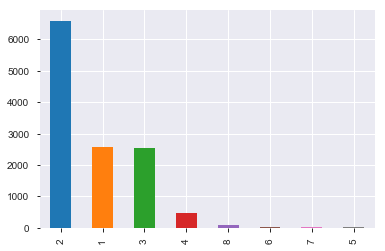

In [13]:
a=data['OperatingSystems'].value_counts()
a.plot(kind='bar')

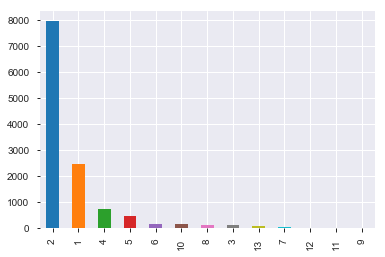

In [14]:
a=data['Browser'].value_counts()
a.plot(kind='bar')


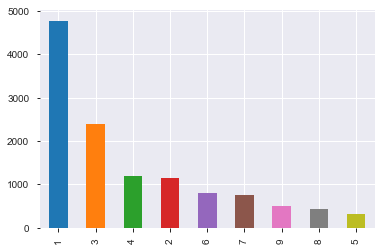

In [15]:
a=data['Region'].value_counts()
a.plot(kind='bar')

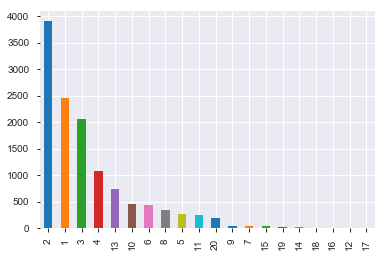

In [16]:
a=data['TrafficType'].value_counts()
a.plot(kind='bar')

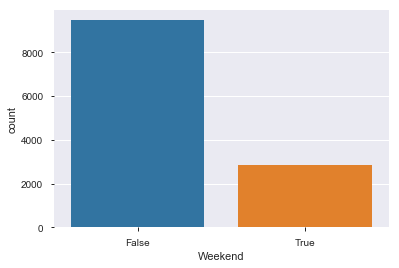

In [17]:
sns.countplot(data['Weekend'])
plt.savefig('Weekend.png')

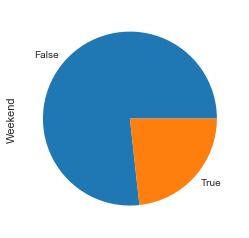

In [18]:
a=data["Weekend"].value_counts()
a.plot(kind='pie')

In [19]:
data["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

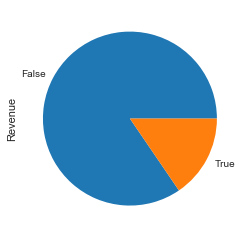

In [20]:
a=data["Revenue"].value_counts()
a.plot(kind='pie')

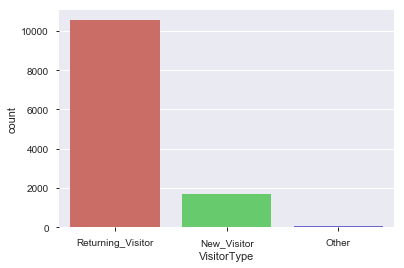

In [21]:
sns.countplot(data["VisitorType"],palette="hls");
plt.show()

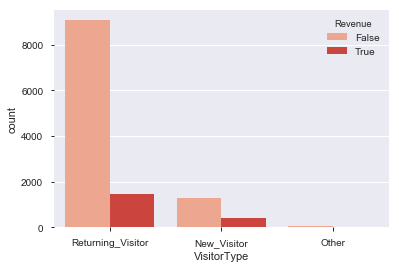

In [22]:
sns.countplot(data["VisitorType"],hue=data["Revenue"],palette="Reds")
plt.savefig('VisitorTypeR.jpg')


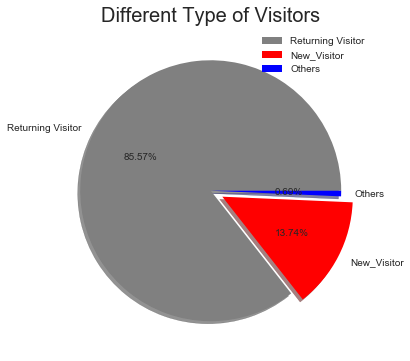

In [23]:
plt.rcParams['figure.figsize'] = (10, 6)
size = [10551, 1694, 85]
colors = ['grey', 'red', 'blue']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0.1, 0]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Type of Visitors', fontsize = 20)
plt.axis('off')
plt.legend()

plt.savefig('Visitors_pie.png')

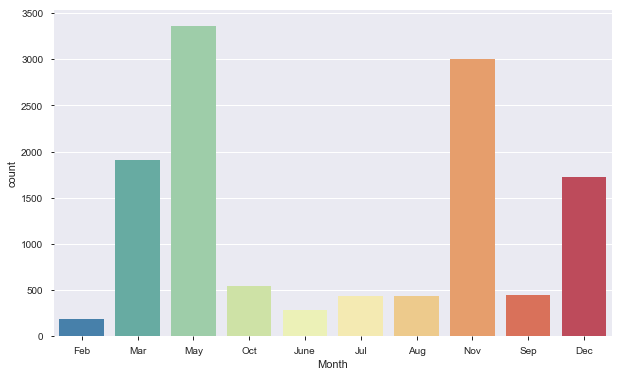

In [24]:
sns.countplot(data["Month"],palette="Spectral_r");
plt.show()


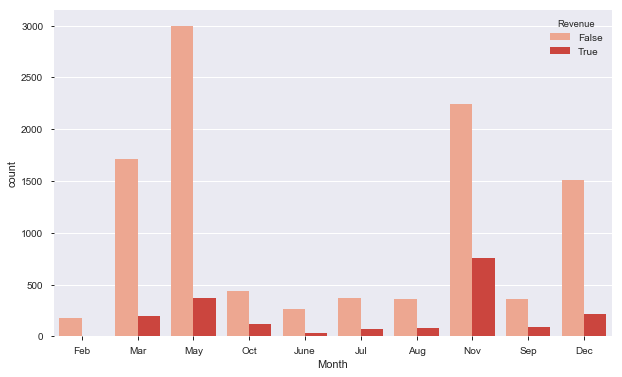

In [25]:
sns.countplot(data["Month"],hue=data["Revenue"],palette="Reds");
plt.show()

In [26]:
data["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

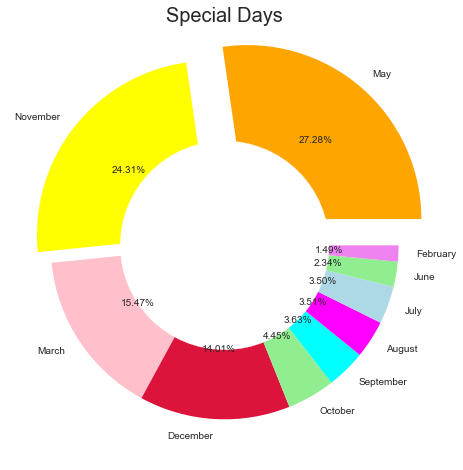

In [27]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')
fig = plt.figure(figsize=(10,8))
#plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = False, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
#plt.legend(loc='best')
plt.savefig('Special.jpg')
plt.show()


## CHANGING FOLLOWING TO CATERGORICAL VARIABLES 

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Month'] = labelencoder.fit_transform(data['Month'])
data['VisitorType'] = labelencoder.fit_transform(data['VisitorType'])
data['Weekend'] = labelencoder.fit_transform(data['Weekend'])
data['Revenue'] = labelencoder.fit_transform(data['Revenue'])

In [29]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0

In [30]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## SPOT CHECK

In [31]:
sys.path.insert(0, 'C:/Users/Vijayan Nair/Desktop/GreatLAKES/PROJECT/CAPSTONE') 

print("\nCurrent working directory %s" %os.getcwd())



Current working directory C:\Users\Vijayan Nair\Desktop\CAPSTONE


In [32]:
MODELS_start_time = time.time() 

from   common           import  draw_boxplot, draw_hist, split_target_predictor, split_train_test 
from   model_building   import  check_linearity, get_significant_vars, logit_reg, compare_models 

X, Y       = split_target_predictor(data, 'Revenue')
X_names    = list(data.columns)

In [33]:
X_names

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [34]:
X_names.remove('Revenue')

X = pd.DataFrame(X)
X.columns  = X_names 

X.head().T

0     1    2         3       4
Administrative           0.0   0.0  0.0  0.000000    0.00
Administrative_Duration  0.0   0.0  0.0  0.000000    0.00
Informational            0.0   0.0  0.0  0.000000    0.00
Informational_Duration   0.0   0.0  0.0  0.000000    0.00
ProductRelated           1.0   2.0  1.0  2.000000   10.00
ProductRelated_Duration  0.0  64.0  0.0  2.666667  627.50
BounceRates              0.2   0.0  0.2  0.050000    0.02
ExitRates                0.2   0.1  0.2  0.140000    0.05
PageValues               0.0   0.0  0.0  0.000000    0.00
SpecialDay               0.0   0.0  0.0  0.000000    0.00
Month                    2.0   2.0  2.0  2.000000    2.00
OperatingSystems         1.0   2.0  4.0  3.000000    3.00
Browser                  1.0   2.0  1.0  2.000000    3.00
Region                   1.0   1.0  9.0  2.000000    1.00
TrafficType              1.0   2.0  3.0  4.000000    4.00
VisitorType              2.0   2.0  2.0  2.000000    2.00
Weekend                  0.0   0.0  0.0  0.000000    1.00

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

roc_auc

 n_splits 10 random_state 0
LR: 0.893879 (0.014087)

 n_splits 10 random_state 0
KNN: 0.760236 (0.014050)

 n_splits 10 random_state 0
CART: 0.739792 (0.020847)

 n_splits 10 random_state 0
NB: 0.840865 (0.013737)

 n_splits 10 random_state 0
RF: 0.893362 (0.015979)


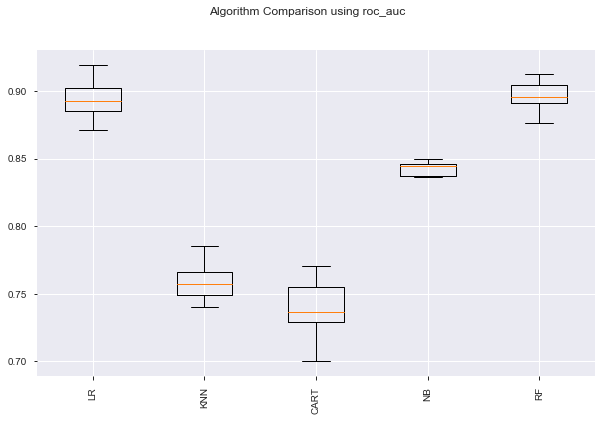

precision

 n_splits 10 random_state 0
LR: 0.739700 (0.048751)

 n_splits 10 random_state 0
KNN: 0.599218 (0.044810)

 n_splits 10 random_state 0
CART: 0.540494 (0.023336)

 n_splits 10 random_state 0
NB: 0.501984 (0.031850)

 n_splits 10 random_state 0
RF: 0.710817 (0.042958)


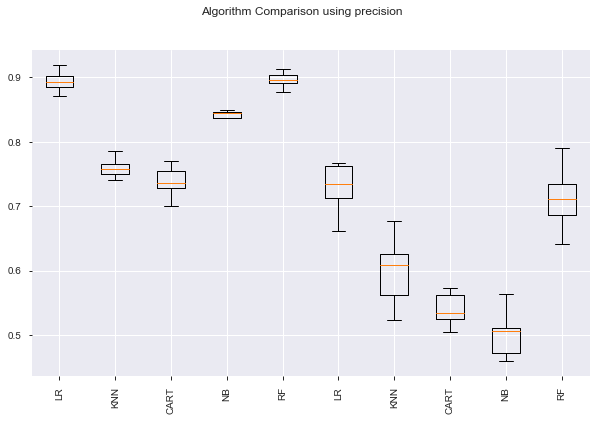

recall

 n_splits 10 random_state 0
LR: 0.378807 (0.046606)

 n_splits 10 random_state 0
KNN: 0.305017 (0.020221)

 n_splits 10 random_state 0
CART: 0.566143 (0.036761)

 n_splits 10 random_state 0
NB: 0.544541 (0.042807)

 n_splits 10 random_state 0
RF: 0.507983 (0.048077)


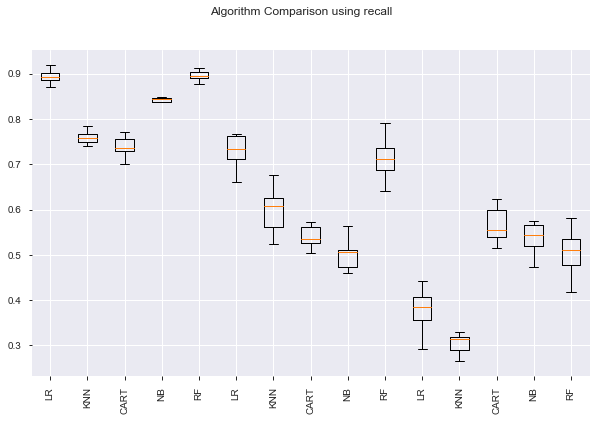

In [36]:
n_splits     = 10
random_state = 0

compare_models(n_splits, random_state, X_train, Y_train)

In [37]:
MODELS_elapsed_time_secs = time.time() - MODELS_start_time

MODELS_elapsed_time_msg = "Model comparison - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(MODELS_elapsed_time_secs))

print(MODELS_elapsed_time_msg)

Model comparison - Execution took: 0:00:11 secs (Wall clock time)


# Run profiler on the data frame, ONLINE SHOPPER INTENTION(OSI) data

In [38]:
pfrep  = pandas_profiling.ProfileReport(data)

In [39]:
pfrep.to_file('./OSI Database report.html')

## FUNCTIONS

In [40]:
def draw_cm( actual, predicted ):
  
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    plt.figure(figsize=(10,5))
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()   

In [41]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
  
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Revenue Characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [42]:
def decision_tree_no_pruning(model, X, y, flist,file_name):
    from sklearn.tree            import export_graphviz
    from sklearn.externals.six   import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(10,8)
    import pydot

    dotfile = StringIO()
    export_graphviz(clf,out_file = dotfile,feature_names = feature_names)
    graph = pydotplus.graph_from_dot_data(dotfile.getvalue())  
    return Image(graph.create_png())


In [43]:
def decision_tree_with_pruning(clf, X, y, flist, file_name):
    from sklearn.tree            import export_graphviz
    from sklearn.externals.six   import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(12.5, 6)
   
    dotfile = StringIO()
    export_graphviz(clf,out_file = dotfile,feature_names = feature_names)  
    graph = pydotplus.graph_from_dot_data(dotfile.getvalue())  
    return Image(graph.create_png())

In [44]:
"'                         This function returns a set of rules defined in the Decision Tree which is easy to understand              '"

def tree_to_rules(tree, feature_names, class_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):

        indent = "  " * depth

        if (threshold[node] != -2):

            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")

            if left[node] != -1:

                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")

                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)

                print(indent,"}")

        else:
            if value[node][0,0] > value[node][0,1]:
              classified = class_names[0]
            else:
              classified = class_names[1]
            print(indent,"Class = " + classified)
    recurse(left, right, threshold, features, 0)

In [45]:
'''                                           This function calculates the Youdens J score which gives the optimum cut-off           point given the fpr, tpr and thresholds             '''

def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

## ANALYSING DATA

In [46]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [47]:
categorical_var =  ['Revenue','Weekend','VisitorType']
numerical_var   =  feature_names.drop(categorical_var)
print("categorical_var \n",categorical_var )
print('*'*100)
print("numerical_var \n", numerical_var)

categorical_var 
 ['Revenue', 'Weekend', 'VisitorType']
****************************************************************************************************
numerical_var 
 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')


In [48]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0

In [49]:
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay         Month  \
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427      5.163990   
std        0.048488      0.048597     18.568437      0.198917      2.370199   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000      5.000000   
50%        0.003112      0.025156      0.000000      0.000000      6.000000   
75%        0.016813      0.050000      0.000000      0.000000      7.000000   
max        0.200000      0.200000    361.763742      1.000000      9.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      12330.000000  12330.000000  12330.000000  12330.000000   
mean           2.124006      2.357097      3.147364      4.069586   
std            0.911325      1.717277      2.401591      4.025169   
min            1.000000      1.000000      1.000000      1.000000   
25%            2.000000      2.000000      1.000000      2.000000   
50%            2.000000      2.000000      3.000000      2.000000   
75%            3.000000      2.000000      4.000000      4.000000   
max            8.000000     13.000000      9.000000     20.000000   

        VisitorType       Weekend       Revenue  
count  12330.000000  12330.000000  12330.000000  
mean       1.718329      0.232603      0.154745  
std        0.690759      0.422509      0.361676  
min        0.000000      0.000000      0.000000  
25%        2.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000  
75%        2.000000      0.000000      0.000000  
max        2.000000      1.000000      1.000000

In [50]:
data['VisitorType'].unique()

array([2, 0, 1], dtype=int64)

In [51]:
len(data.columns)

18

## FEATURE SELECTION using CHI-SQUARE

In [52]:
df=data.copy()

In [53]:
quantiles=np.arange(0.1,1,0.1)
admin_quatiles=[]
for i in range(len(quantiles)):
    admin_quatiles.append(df.Administrative_Duration.quantile(quantiles[i]))

                          
def Add_dur_quatiles(add_dur):
    if (add_dur<admin_quatiles[0]):
        return 0
    elif (add_dur >= admin_quatiles[0] and add_dur<admin_quatiles[1]):
        return 1
    elif (add_dur >= admin_quatiles[1] and add_dur<admin_quatiles[2]):
        return 2
    elif (add_dur >= admin_quatiles[2] and add_dur<admin_quatiles[3]):
        return 3
    elif (add_dur >= admin_quatiles[3] and add_dur<admin_quatiles[4]):
        return 4
    elif (add_dur >= admin_quatiles[4] and add_dur<admin_quatiles[5]):
        return 5          
    elif (add_dur >= admin_quatiles[5] and add_dur<admin_quatiles[6]):
        return 6
    elif (add_dur >= admin_quatiles[6] and add_dur<admin_quatiles[7]):
        return 7
    elif (add_dur >= admin_quatiles[7] and add_dur<admin_quatiles[8]):
        return 8
    else:
        return 9


In [54]:
admin_quatiles

[0.0, 0.0, 0.0, 0.0, 7.5, 37.0, 71.2, 121.425, 224.88750000000005]

In [55]:
df['class_admin_dur']=df.Administrative_Duration.apply(Add_dur_quatiles)

In [56]:
df.class_admin_dur.value_counts()

4    6164
6    1244
8    1234
7    1233
9    1233
5    1222
Name: class_admin_dur, dtype: int64

In [57]:
quantiles=np.arange(0.1,1,0.1)
info_quatiles=[]
for i in range(len(quantiles)):
    info_quatiles.append(df.Informational_Duration.quantile(quantiles[i]))

                          
def info_dur_quatiles(info_dur):
    if (info_dur<info_quatiles[0]):
        return 0
    elif (info_dur >= info_quatiles[0] and info_dur<info_quatiles[1]):
        return 1
    elif (info_dur >= info_quatiles[1] and info_dur<info_quatiles[2]):
        return 2
    elif (info_dur >= info_quatiles[2] and info_dur<info_quatiles[3]):
        return 3
    elif (info_dur >= info_quatiles[3] and info_dur<info_quatiles[4]):
        return 4
    elif (info_dur >= info_quatiles[4] and info_dur<info_quatiles[5]):
        return 5          
    elif (info_dur >= info_quatiles[5] and info_dur<info_quatiles[6]):
        return 6
    elif (info_dur >= info_quatiles[6] and info_dur<info_quatiles[7]):
        return 7
    elif (info_dur >= info_quatiles[7] and info_dur<info_quatiles[8]):
        return 8
    else:
        return 9


In [58]:
info_quatiles

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 72.0]

In [59]:
df['class_Info_dur']=df.Informational_Duration.apply(info_dur_quatiles)

In [60]:
df.class_Info_dur.value_counts()

8    11095
9     1235
Name: class_Info_dur, dtype: int64

In [61]:
quantiles=np.arange(0.1,1,0.1)
prod_quatiles=[]
for i in range(len(quantiles)):
    prod_quatiles.append(df.ProductRelated_Duration.quantile(quantiles[i]))

                          
def prod_dur_quatiles(prod_dur):
    if (prod_dur<prod_quatiles[0]):
        return 0
    elif (prod_dur >= prod_quatiles[0] and prod_dur<prod_quatiles[1]):
        return 1
    elif (prod_dur >= prod_quatiles[1] and prod_dur<prod_quatiles[2]):
        return 2
    elif (prod_dur >= prod_quatiles[2] and prod_dur<prod_quatiles[3]):
        return 3
    elif (prod_dur >= prod_quatiles[3] and prod_dur<prod_quatiles[4]):
        return 4
    elif (prod_dur >= prod_quatiles[4] and prod_dur<prod_quatiles[5]):
        return 5          
    elif (prod_dur >= prod_quatiles[5] and prod_dur<prod_quatiles[6]):
        return 6
    elif (prod_dur >= prod_quatiles[6] and prod_dur<prod_quatiles[7]):
        return 7
    elif (prod_dur >= prod_quatiles[7] and prod_dur<prod_quatiles[8]):
        return 8
    else:
        return 9

In [62]:
prod_quatiles

[36.0,
 129.0,
 246.97999999000007,
 402.11721614000004,
 598.9369047499999,
 852.0,
 1227.0141666,
 1775.9286666000003,
 2877.863333300001]

In [63]:
df['class_prod_dur']=df.ProductRelated_Duration.apply(prod_dur_quatiles)

In [64]:
df.class_prod_dur.value_counts()

2    1237
6    1234
7    1233
4    1233
3    1233
9    1233
8    1233
5    1232
1    1231
0    1231
Name: class_prod_dur, dtype: int64

In [65]:
quantiles=np.arange(0.1,1,0.1)
BounceRates_quatiles=[]
for i in range(len(quantiles)):
    BounceRates_quatiles.append(df.BounceRates.quantile(quantiles[i]))

                          
def Bounce_rate_quatiles(bounce_rate):
    if (bounce_rate >= min(df.BounceRates) and bounce_rate<BounceRates_quatiles[0]):
        return 0
    elif (bounce_rate >= BounceRates_quatiles[0] and bounce_rate<BounceRates_quatiles[1]):
        return 1
    elif (bounce_rate >= BounceRates_quatiles[1] and bounce_rate<BounceRates_quatiles[2]):
        return 2
    elif (bounce_rate >= BounceRates_quatiles[2] and bounce_rate<BounceRates_quatiles[3]):
        return 3
    elif (bounce_rate >= BounceRates_quatiles[3] and bounce_rate<BounceRates_quatiles[4]):
        return 4
    elif (bounce_rate >= BounceRates_quatiles[4] and bounce_rate<BounceRates_quatiles[5]):
        return 5          
    elif (bounce_rate >= BounceRates_quatiles[5] and bounce_rate<BounceRates_quatiles[6]):
        return 6
    elif (bounce_rate >= BounceRates_quatiles[6] and bounce_rate<BounceRates_quatiles[7]):
        return 7
    elif (bounce_rate >= BounceRates_quatiles[7] and bounce_rate<BounceRates_quatiles[8]):
        return 8
    else:
        return 9

In [66]:
BounceRates_quatiles

[0.0,
 0.0,
 0.0,
 0.0,
 0.0031124675,
 0.007142856999999999,
 0.012858997799999983,
 0.023076923,
 0.05819696950000005]

In [67]:
df['class_bouncerate']=df.BounceRates.apply(Bounce_rate_quatiles)

In [68]:
df.class_bouncerate.value_counts()

4    6165
6    1251
8    1236
9    1233
7    1230
5    1215
Name: class_bouncerate, dtype: int64

In [69]:
quantiles=np.arange(0.1,1,0.1)
ExitRates_quatiles=[]
for i in range(len(quantiles)):
    ExitRates_quatiles.append(df.ExitRates.quantile(quantiles[i]))

                          
def Exit_rate_quatiles(exit_rate):
    if (exit_rate<ExitRates_quatiles[0]):
        return 0
    elif (exit_rate >= ExitRates_quatiles[0] and exit_rate<ExitRates_quatiles[1]):
        return 1
    elif (exit_rate >= ExitRates_quatiles[1] and exit_rate<ExitRates_quatiles[2]):
        return 2
    elif (exit_rate >= ExitRates_quatiles[2] and exit_rate<ExitRates_quatiles[3]):
        return 3
    elif (exit_rate >= ExitRates_quatiles[3] and exit_rate<ExitRates_quatiles[4]):
        return 4
    elif (exit_rate >= ExitRates_quatiles[4] and exit_rate<ExitRates_quatiles[5]):
        return 5          
    elif (exit_rate >= ExitRates_quatiles[5] and exit_rate<ExitRates_quatiles[6]):
        return 6
    elif (exit_rate >= ExitRates_quatiles[6] and exit_rate<ExitRates_quatiles[7]):
        return 7
    elif (exit_rate >= ExitRates_quatiles[7] and exit_rate<ExitRates_quatiles[8]):
        return 8
    else:
        return 9


In [70]:
ExitRates_quatiles

[0.007449346100000002,
 0.012071114,
 0.016216216000000002,
 0.020512821,
 0.0251564025,
 0.0328713448,
 0.041269841,
 0.058333333,
 0.1]

In [71]:
df['class_exitrate']=df.ExitRates.apply(Exit_rate_quatiles)

In [72]:
df.class_exitrate.value_counts()

9    1450
4    1242
5    1233
1    1233
0    1233
2    1231
6    1230
3    1226
7    1225
8    1027
Name: class_exitrate, dtype: int64

In [73]:
s=df.ExitRates[df.ExitRates<0.007449346100000002]

In [74]:
len(s)

1233

In [75]:
quantiles=np.arange(0.1,1,0.1)
PageValues_quatiles=[]
for i in range(len(quantiles)):
    PageValues_quatiles.append(df.PageValues.quantile(quantiles[i]))

                          
def Page_Values_quatiles(Page_Values):
    if (Page_Values<PageValues_quatiles[0]):
        return 0
    elif (Page_Values >= PageValues_quatiles[0] and Page_Values<PageValues_quatiles[1]):
        return 1
    elif (Page_Values >= PageValues_quatiles[1] and Page_Values<PageValues_quatiles[2]):
        return 2
    elif (Page_Values >= PageValues_quatiles[2] and Page_Values<PageValues_quatiles[3]):
        return 3
    elif (Page_Values >= PageValues_quatiles[3] and Page_Values<PageValues_quatiles[4]):
        return 4
    elif (Page_Values >= PageValues_quatiles[4] and Page_Values<PageValues_quatiles[5]):
        return 5          
    elif (Page_Values >= PageValues_quatiles[5] and Page_Values<PageValues_quatiles[6]):
        return 6
    elif (Page_Values >= PageValues_quatiles[6] and Page_Values<PageValues_quatiles[7]):
        return 7
    elif (Page_Values >= PageValues_quatiles[7] and Page_Values<PageValues_quatiles[8]):
        return 8
    else:
        return 9


In [76]:
PageValues_quatiles

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.060078087400001, 18.855502398000006]

In [77]:
df['class_pagevalue']=df.PageValues.apply(Page_Values_quatiles)

In [78]:
df.class_pagevalue.value_counts()

7    9864
9    1233
8    1233
Name: class_pagevalue, dtype: int64

In [79]:
from scipy.stats import chi2,chi2_contingency

contingency_table = pd.crosstab(
    df['Administrative'],
    df['Revenue'],
    margins = True)

stat,p,dof,expected=chi2_contingency(contingency_table)

prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [80]:
stat

414.9767598349634

In [81]:
p

3.8279591440714144e-57

In [82]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'class_admin_dur', 'class_Info_dur',
       'class_prod_dur', 'class_bouncerate', 'class_exitrate',
       'class_pagevalue'],
      dtype='object')

In [83]:
df=df.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues'],axis=1)

In [84]:
df.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'SpecialDay',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue', 'class_admin_dur',
       'class_Info_dur', 'class_prod_dur', 'class_bouncerate',
       'class_exitrate', 'class_pagevalue'],
      dtype='object')

### The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X) pronounced “ki” as in kite.

In [85]:
from scipy.stats import chi2,chi2_contingency

contingency_table = pd.crosstab(
    df['Administrative'],
    df['Revenue'],
    margins = True)

stat,p,dof,expected=chi2_contingency(contingency_table)

prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Administrative Dependent (reject H0)')
else:
	print(' Administrative Independent (fail to reject H0)')

Administrative Dependent (reject H0)


In [86]:
col=df.columns

for i in col:
    contingency_table = pd.crosstab(df['Revenue'],df[i],margins = True)
    stat,p,dof,expected=chi2_contingency(contingency_table)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print(i,'Dependent (reject H0)')
        print(i,'P-value',round(p,3))
    else:
        print(i, 'Independent (fail to reject H0)')
        print(i,'P-value',round(p,3))

Administrative Dependent (reject H0)
Administrative P-value 0.0
Informational Dependent (reject H0)
Informational P-value 0.0
ProductRelated Dependent (reject H0)
ProductRelated P-value 0.0
SpecialDay Dependent (reject H0)
SpecialDay P-value 0.0
Month Dependent (reject H0)
Month P-value 0.0
OperatingSystems Dependent (reject H0)
OperatingSystems P-value 0.0
Browser Independent (fail to reject H0)
Browser P-value 0.373
Region Independent (fail to reject H0)
Region P-value 0.954
TrafficType Dependent (reject H0)
TrafficType P-value 0.0
VisitorType Dependent (reject H0)
VisitorType P-value 0.0
Weekend Dependent (reject H0)
Weekend P-value 0.032
Revenue Dependent (reject H0)
Revenue P-value 0.0
class_admin_dur Dependent (reject H0)
class_admin_dur P-value 0.0
class_Info_dur Dependent (reject H0)
class_Info_dur P-value 0.0
class_prod_dur Dependent (reject H0)
class_prod_dur P-value 0.0
class_bouncerate Dependent (reject H0)
class_bouncerate P-value 0.0
class_exitrate Dependent (reject H0)
c

## Create X(independent variable) & y(dependent variable)

In [87]:
X=data.iloc[:,:17]
y=data.iloc[:,17]
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(12330, 17)
(12330,)


In [88]:
y.value_counts().apply(lambda x: [x, ( x * 100) / data.shape[0]])

0    [10422, 84.52554744525547]
1    [1908, 15.474452554744525]
Name: Revenue, dtype: object

## Since class, 1 (REVENUE) customers form only 0.8% of the data set, we have a unbalanced data set.

## Remove Browser, Region - NULL HYPOTHESIS - failed to reject

In [89]:
data=data.drop(['Browser','Region'],axis=1)

In [90]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   TrafficType  VisitorType  Weekend  Revenue  
0            1            2        0        0  
1            2            2        0        0  
2            3            2        0        0  
3            4            2        0        0  
4            4            2        1        0

In [91]:
data.shape

(12330, 16)

In [92]:
X=data.iloc[:,:15]
y=data.iloc[:,15]
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(12330, 15)
(12330,)


## TRAIN/TEST SPLIT

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [94]:
x_train.head()

Administrative  Administrative_Duration  Informational  \
11332               1                 7.125000              6   
12071               0                 0.000000              0   
10023               0                 0.000000              0   
6771                9               449.816667              0   
4283                0                 0.000000              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
11332             1043.928571              73              3585.177579   
12071                0.000000              12               157.000000   
10023                0.000000              37               638.250000   
6771                 0.000000              17               200.950000   
4283                 6.000000              13              2782.750000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
11332     0.008175   0.024452         0.0         0.0      7   
12071     0.008333   0.033333         0.0         0.0      7   
10023     0.005556   0.016667         0.0         0.0      7   
6771      0.000000   0.024603         0.0         0.0      9   
4283      0.000000   0.005128         0.0         0.4      6   

       OperatingSystems  TrafficType  VisitorType  Weekend  
11332                 3            2            2        0  
12071                 3            1            2        0  
10023                 2            1            2        0  
6771                  2            2            2        0  
4283                  2            2            0        0

In [95]:
y_train.head()

11332    0
12071    0
10023    1
6771     0
4283     0
Name: Revenue, dtype: int64

In [96]:
x_train.shape

(8631, 15)

In [97]:
x_test.shape

(3699, 15)

# DecisionTree

In [98]:
clf = DecisionTreeClassifier(criterion = 'entropy')

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
#Predict the response for train dataset
predicted_train = clf.predict(x_train)


Training Data
[[7345    0]
 [   0 1286]]


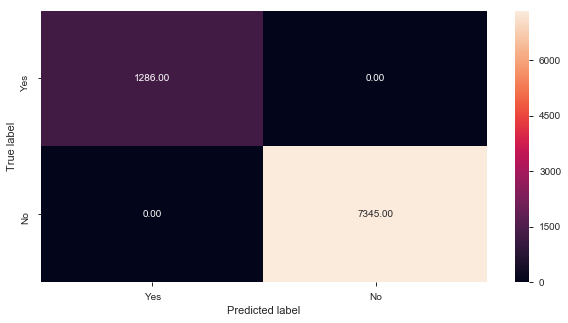

Training Accuracy: 100.000%


In [100]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(y_train, predicted_train )
    
accuracy_train = clf.score(x_train, y_train) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [101]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train) 


Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7345
           1       1.00      1.00      1.00      1286

   micro avg       1.00      1.00      1.00      8631
   macro avg       1.00      1.00      1.00      8631
weighted avg       1.00      1.00      1.00      8631




Training data


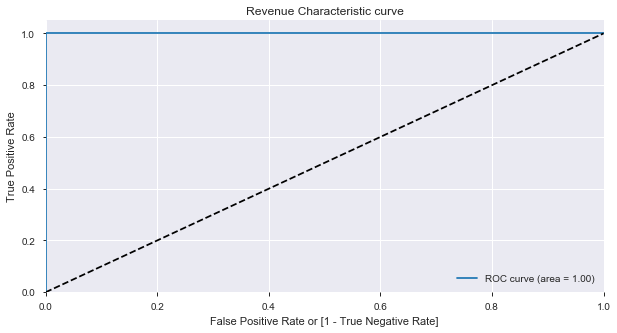

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [102]:
n_splits           =  10
random_state       =  0
scoring            = 'roc_auc'

kfold              =  KFold(n_splits = x_train.shape[0], shuffle = False, random_state = random_state)

auc_train          = cross_val_score(clf, x_train, y_train,  scoring = scoring) 
print("\nTraining data")
draw_roc( y_train, predicted_train)   

In [103]:
#Predict the response for test dataset
predicted_testing = clf.predict(x_test)


Testing Data
[[2812  265]
 [ 279  343]]


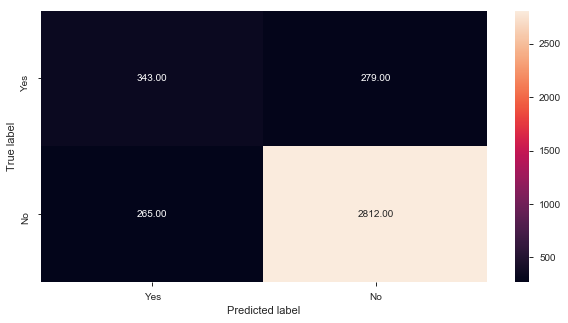

Testing Accuracy: 85.293%


In [104]:
matrix             = confusion_matrix(y_test, predicted_testing)
print("\nTesting Data")
print(matrix)
draw_cm(y_test, predicted_testing )
    
accuracy_train = clf.score(x_test, y_test) 
print("Testing Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [105]:
measures_test      = classification_report(y_test, predicted_testing) 
print("\nTesting data")
print(measures_test) 


Testing data
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3077
           1       0.56      0.55      0.56       622

   micro avg       0.85      0.85      0.85      3699
   macro avg       0.74      0.73      0.73      3699
weighted avg       0.85      0.85      0.85      3699




Testing  data


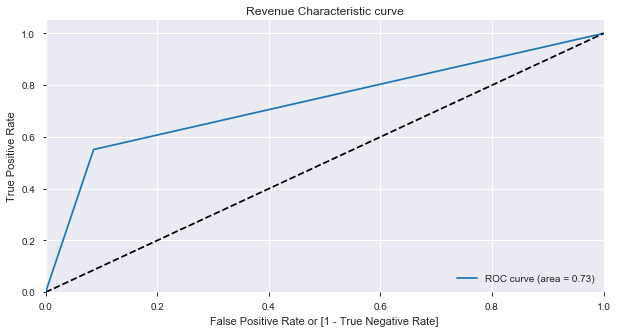

(array([0.        , 0.08612285, 1.        ]),
 array([0.        , 0.55144695, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [106]:
print("\nTesting  data")
draw_roc( y_test, predicted_testing)  

## CART Modeling via DecisionTreeClassifier

In [107]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [108]:
feature_names =  ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'TrafficType', 'VisitorType',
       'Weekend']
class_names   =  ['No Revenue','Revenue']

In [109]:
decision_tree_no_pruning(clf, x_train, y_train, feature_names, 'RevenueCAL')

Couldn't import dot_parser, loading of dot files will not be possible.


## Prune and check the performance of the pruned tree

In [110]:
clf1    =   DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_impurity_decrease = 0)
clf1.fit(x_train, y_train)
#Predict the response for train dataset
predicted_train = clf1.predict(x_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, predicted_train))


Accuracy: 0.9093963619511065



Training Data
[[7006  339]
 [ 443  843]]


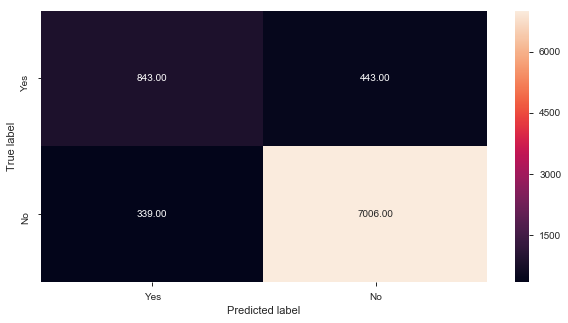

Training Accuracy: 90.940%


In [111]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(y_train, predicted_train )
    
accuracy_train = clf1.score(x_train, y_train) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [112]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train) 


Training data
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7345
           1       0.71      0.66      0.68      1286

   micro avg       0.91      0.91      0.91      8631
   macro avg       0.83      0.80      0.82      8631
weighted avg       0.91      0.91      0.91      8631



## OPTIMUM CUT OFF REQUIRED SINCE DATA INBALANCE

In [113]:
"""
  This function calculates the Youdens J score which gives the optimum cut-off point given the fpr, tpr and thresholds
"""
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = np.abs(tpr - fpr)
    j_ordered = sorted(zip(j_scores,thresholds, fpr, tpr))
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    res = {'fpr': j_ordered[-1][2], 'tpr': j_ordered[-1][3], 'threshold' : j_ordered[-1][1]}
    return res

In [114]:
predicted_proba_tr = clf1.predict_proba(x_train)

In [115]:
print(predicted_proba_tr[:5,1])

[0.23577236 0.07910751 0.07910751 0.07910751 0.        ]


In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
threshold_df            =  pd.DataFrame()  
threshold_df['Actual']  = y_train
threshold_df.dropna(inplace = True)

In [118]:
threshold_values = np.arange(0.10,0.80,0.02)

cutoff_df        = pd.DataFrame()

for i in range(len(threshold_values)):
    
    threshold                   = threshold_values[i]
    threshold_df['Probability'] = predicted_proba_tr[:,1]
    threshold_df['pred']        = threshold_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
    cm                          = confusion_matrix(threshold_df['Actual'].astype('int'),\
                                                   threshold_df['pred'])
    precision                   = np.diag(cm) / np.sum(cm, axis = 0)
    recall                      = np.diag(cm) / np.sum(cm, axis = 1) 
    accuracy_ratio              = ((cm[0,0] + cm[1,1]) * 100) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    #auroc                       = 
    recall_positive             = recall[1]
    precision_positive          = precision[1]
    cutoff_df_ind               = pd.DataFrame({'Threshold': threshold, 'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
    print(cutoff_df_ind)
    print(cm)
    cutoff_df.append(cutoff_df_ind)  
print(cutoff_df.head())

   Threshold    Recall  Precision  Accuracy Ratio
0        0.1  0.855365   0.518623       86.015525
[[6324 1021]
 [ 186 1100]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.12  0.855365   0.518623       86.015525
[[6324 1021]
 [ 186 1100]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.14  0.855365   0.518623       86.015525
[[6324 1021]
 [ 186 1100]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.16  0.8507   0.526215        86.36311
[[6360  985]
 [ 192 1094]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.18  0.8507   0.526215        86.36311
[[6360  985]
 [ 192 1094]]
   Threshold  Recall  Precision  Accuracy Ratio
0        0.2  0.8507   0.526215        86.36311
[[6360  985]
 [ 192 1094]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.22  0.8507   0.526215        86.36311
[[6360  985]
 [ 192 1094]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.24  0.805599   0.565194       87.869308
[[6548  797]
 [ 250 1036]]


{'fpr': 0.13410483321987746,
 'tpr': 0.8506998444790047,
 'threshold': 0.23577235772357724}

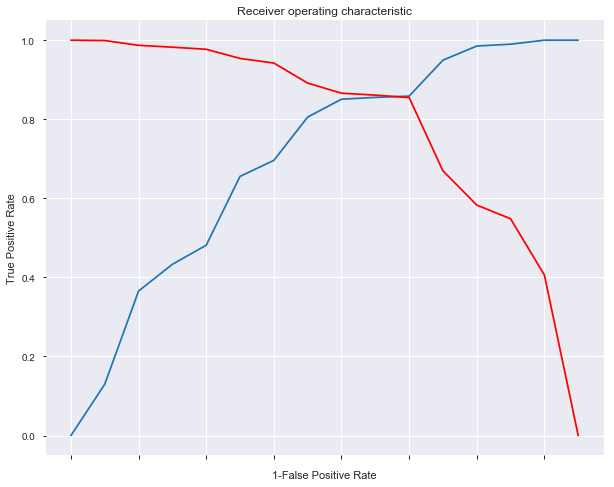

In [119]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, threshold_df['Probability'], \
                                         drop_intermediate = True )
get_youdens_j_cutoff(fpr, tpr, thresholds)  

## TEST DATA METRICS

In [120]:
#Predict the response for test dataset
predicted_test = clf1.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted_test))

Accuracy: 0.8913219789132197


In [121]:
#Predict the response for test dataset
measures_test      = classification_report(y_test, predicted_test) 
print("\nTesting data")
print(measures_test) 


Testing data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3077
           1       0.70      0.63      0.66       622

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.81      0.79      0.80      3699
weighted avg       0.89      0.89      0.89      3699




Testing Data
[[2906  171]
 [ 231  391]]


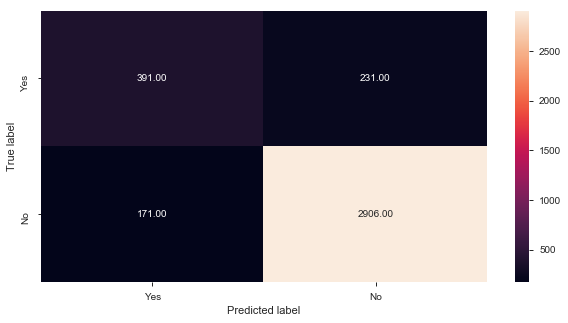

Testing Accuracy: 89.132%

Testing data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3077
           1       0.70      0.63      0.66       622

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.81      0.79      0.80      3699
weighted avg       0.89      0.89      0.89      3699



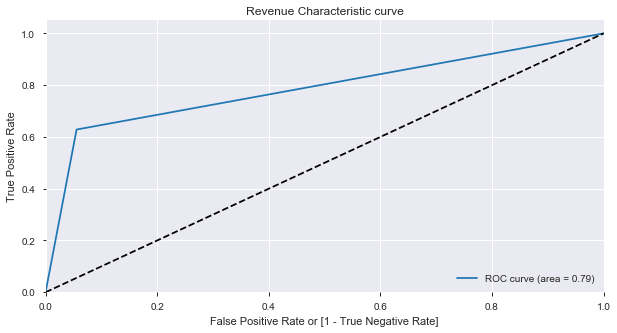

(array([0.        , 0.05557361, 1.        ]),
 array([0.        , 0.62861736, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [122]:
#Predict the response for test dataset
predicted_testing = clf1.predict(x_test)
matrix             = confusion_matrix(y_test, predicted_testing)
print("\nTesting Data")
print(matrix)
draw_cm(y_test, predicted_testing )
    
accuracy_train = clf1.score(x_test, y_test) 
print("Testing Accuracy: %.3f%%" % (accuracy_train * 100.0))
measures_test      = classification_report(y_test, predicted_testing) 
print("\nTesting data")
print(measures_test) 
draw_roc( y_test, predicted_testing) 

### There is an increase in the Accuracy score after pruning


Threshold is 0.200 

[[ 515  107]
 [ 445 2632]]


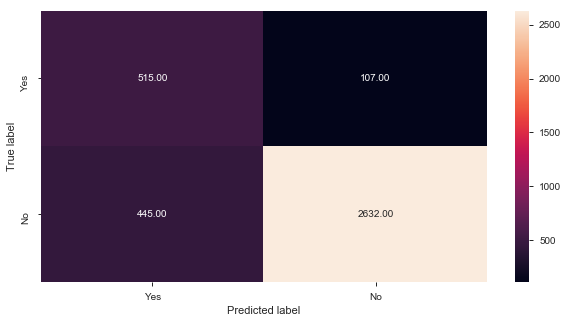

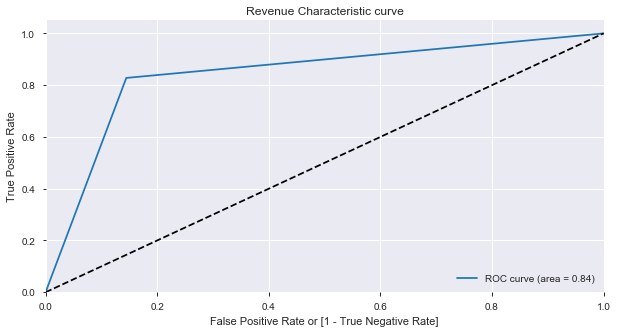

   Threshold    Recall  Precision  Accuracy Ratio
0        0.2  0.855379   0.960935       85.077048


In [123]:
predicted_proba_test              = clf1.predict_proba(x_test)
threshold__test_df                =  pd.DataFrame()  
threshold__test_df ['Actual']     =  y_test
threshold__test_df.dropna(inplace = True)
threshold_values                  = np.arange(0.20,0.23,0.03)
cutoff_df                         = pd.DataFrame()

for i in range(len(threshold_values)):
    
    threshold                         = threshold_values[i]
    print("\nThreshold is %0.3f" %threshold,"\n")
    threshold__test_df['Probability'] = predicted_proba_test[:,1]
    threshold__test_df['pred']        =  threshold__test_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
    cm                                = confusion_matrix(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'],[1,0])
    print(cm)
    draw_cm(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'])
    draw_roc(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred']) 
    precision                         = np.diag(cm) / np.sum(cm, axis = 0)
    recall                            = np.diag(cm) / np.sum(cm, axis = 1) 
    accuracy_ratio                    = ((cm[0,0] + cm[1,1]) * 100) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    recall_positive                   = recall[1]
    precision_positive                = precision[1]
    cutoff_df_ind                     = pd.DataFrame({'Threshold': threshold, 'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
    print(cutoff_df_ind)

    cutoff_df.append(cutoff_df_ind)  

# DECISION TREE PRUNED

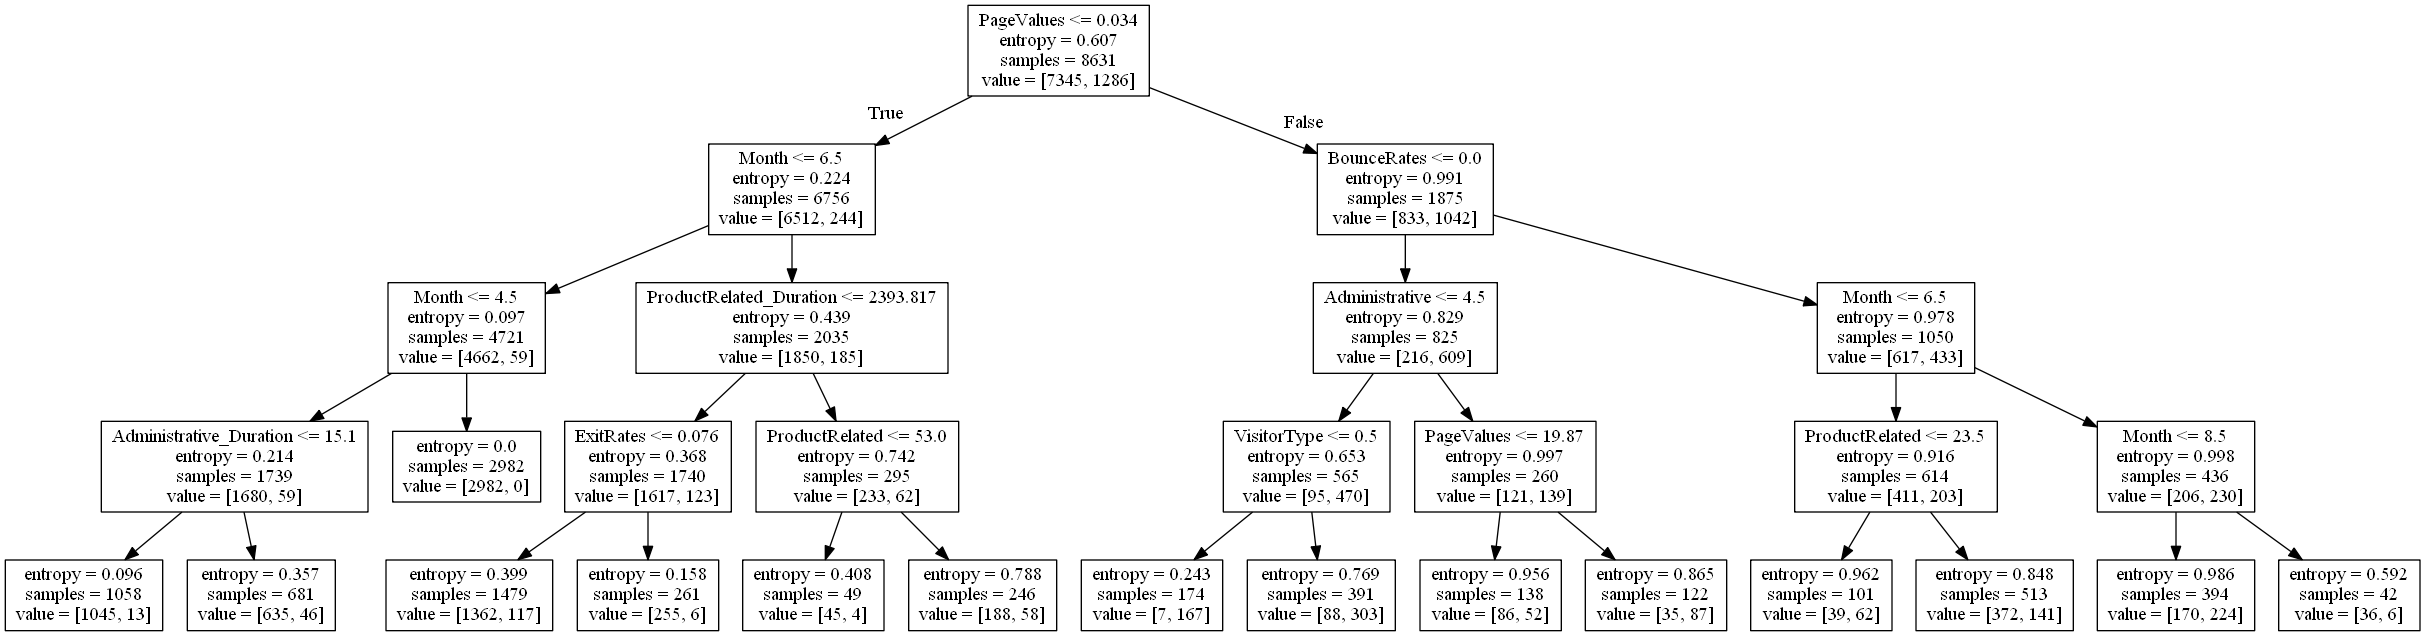

In [124]:
decision_tree_with_pruning(clf1, X_train, y_train, feature_names, 'Revenue PRUNED')

In [125]:
tree_to_rules(clf1, list(X_train.loc[:,feature_names]), class_names)

 if ( PageValues <= 0.0335247740149498 ) {
   if ( Month <= 6.5 ) {
     if ( Month <= 4.5 ) {
       if ( Administrative_Duration <= 15.099999904632568 ) {
         Class = No Revenue
       } else {
         Class = No Revenue
       }
     } else {
       Class = No Revenue
     }
   } else {
     if ( ProductRelated_Duration <= 2393.8172607421875 ) {
       if ( ExitRates <= 0.07642857357859612 ) {
         Class = No Revenue
       } else {
         Class = No Revenue
       }
     } else {
       if ( ProductRelated <= 53.0 ) {
         Class = No Revenue
       } else {
         Class = No Revenue
       }
     }
   }
 } else {
   if ( BounceRates <= 8.10999990790151e-05 ) {
     if ( Administrative <= 4.5 ) {
       if ( VisitorType <= 0.5 ) {
         Class = Revenue
       } else {
         Class = Revenue
       }
     } else {
       if ( PageValues <= 19.870142936706543 ) {
         Class = No Revenue
       } else {
         Class = Revenue
       }
     }
   } else {
   

## VARIABLE IMPORTANCE PLOTS

In [126]:
varImp_df   = pd.DataFrame({'Feature_names' :feature_names,\
                            'Importances' : clf1.feature_importances_})
varImp_df.sort_values('Importances', ascending = False) 

Feature_names  Importances
8                PageValues     0.748466
10                    Month     0.118589
6               BounceRates     0.058278
0            Administrative     0.022179
4            ProductRelated     0.013766
5   ProductRelated_Duration     0.013604
1   Administrative_Duration     0.010925
13              VisitorType     0.010312
7                 ExitRates     0.003880
2             Informational     0.000000
3    Informational_Duration     0.000000
9                SpecialDay     0.000000
11         OperatingSystems     0.000000
12              TrafficType     0.000000
14                  Weekend     0.000000

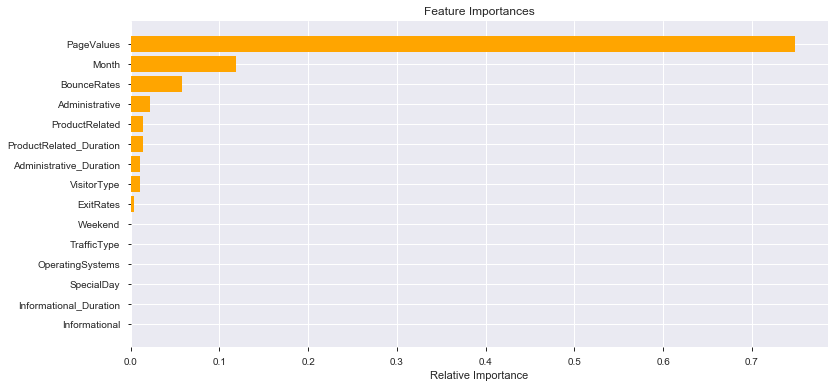

In [127]:
importances = clf1.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# RANDOM FOREST

In [128]:
X=data.iloc[:,:15]
y=data.iloc[:,15]
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(12330, 15)
(12330,)


## TRAIN/TEST SPLIT

In [129]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [130]:
x_train.head()

Administrative  Administrative_Duration  Informational  \
11332               1                 7.125000              6   
12071               0                 0.000000              0   
10023               0                 0.000000              0   
6771                9               449.816667              0   
4283                0                 0.000000              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
11332             1043.928571              73              3585.177579   
12071                0.000000              12               157.000000   
10023                0.000000              37               638.250000   
6771                 0.000000              17               200.950000   
4283                 6.000000              13              2782.750000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
11332     0.008175   0.024452         0.0         0.0      7   
12071     0.008333   0.033333         0.0         0.0      7   
10023     0.005556   0.016667         0.0         0.0      7   
6771      0.000000   0.024603         0.0         0.0      9   
4283      0.000000   0.005128         0.0         0.4      6   

       OperatingSystems  TrafficType  VisitorType  Weekend  
11332                 3            2            2        0  
12071                 3            1            2        0  
10023                 2            1            2        0  
6771                  2            2            2        0  
4283                  2            2            0        0

In [131]:
y_train.head()

11332    0
12071    0
10023    1
6771     0
4283     0
Name: Revenue, dtype: int64

In [132]:
x_train.shape

(8631, 15)

In [133]:
x_test.shape

(3699, 15)

## RandomForest Modeling

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train,  y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
y_pred_rf=clf_rf.predict(x_test)

In [137]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## RF SCORES

In [138]:
print(accuracy_score(y_test,y_pred_rf)*100)

88.56447688564477


In [139]:
print(precision_score(y_test,y_pred_rf)*100)

74.44717444717445


In [140]:
print(recall_score(y_test,y_pred_rf)*100)

48.71382636655949


In [141]:
print(f1_score(y_test,y_pred_rf)*100)

58.89212827988338


In [142]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3077
           1       0.74      0.49      0.59       622

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.82      0.73      0.76      3699
weighted avg       0.88      0.89      0.88      3699



In [143]:
print(confusion_matrix(y_test,y_pred_rf))


[[2973  104]
 [ 319  303]]


<Figure size 720x576 with 0 Axes>

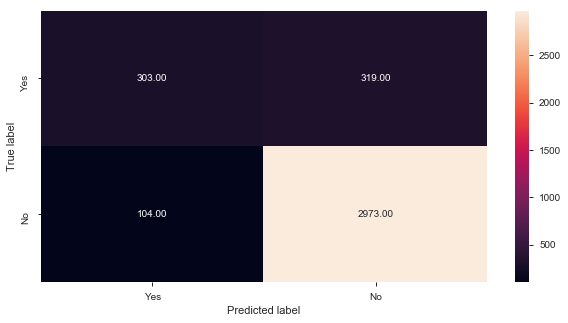

In [144]:
plt.figure(figsize=(10,8))

cm=confusion_matrix(y_test,y_pred_rf)

draw_cm(y_test, y_pred_rf )


In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

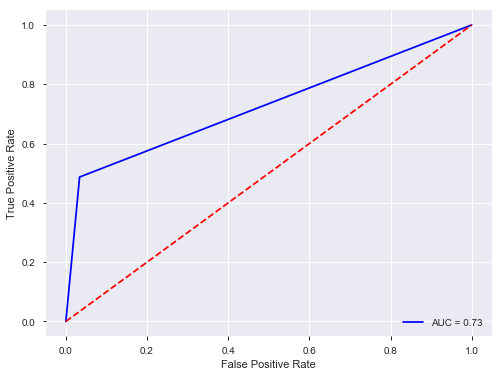

In [146]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)
area = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', label = 'AUC = %0.2f' % area)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## RANDOM FOREST GRID SEARCH

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [148]:
# build a classifier
clf_rf = RandomForestClassifier(50)

## GRID SEARCH

In [149]:
# use a full grid over all parameters
param_grid = {"max_depth": [1,3,5,7],
              "max_features": [3,6,9],
              "min_samples_split": [3,6,9],
              "min_samples_leaf": [3,6,9],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [150]:
# run grid search
grid_search = GridSearchCV(clf_rf, param_grid=param_grid)
grid_search.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7], 'max_features': [3, 6, 9], 'min_samples_split': [3, 6, 9], 'min_samples_leaf': [3, 6, 9], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [151]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [152]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

## RF Modeling - AFTER GRIDSEARCH

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
clf_rf = RandomForestClassifier(n_estimators=25,criterion='gini',max_depth=3, max_features=6,min_samples_leaf= 9,min_samples_split= 9,bootstrap = True, random_state=0 )
clf_rf.fit(x_train,  y_train) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [155]:
y_pred_rf=clf_rf.predict(x_test)

In [156]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### RF SCORES after inserting parameters

In [157]:
print(accuracy_score(y_test,y_pred_rf)*100)

88.61854555285213


In [158]:
print(precision_score(y_test,y_pred_rf)*100)

73.31786542923435


In [159]:
print(recall_score(y_test,y_pred_rf)*100)

50.80385852090033


In [160]:
print(f1_score(y_test,y_pred_rf)*100)

60.01899335232669


In [161]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3077
           1       0.73      0.51      0.60       622

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699



In [162]:
print(confusion_matrix(y_test,y_pred_rf))


[[2962  115]
 [ 306  316]]


<Figure size 720x576 with 0 Axes>

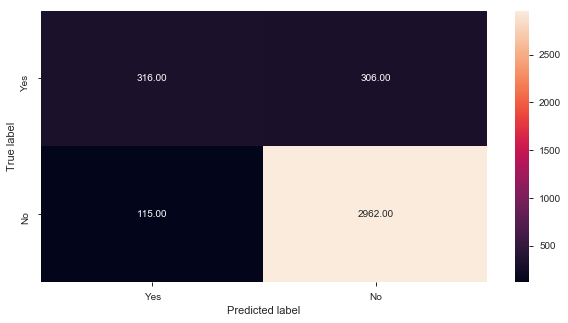

In [163]:

plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test,y_pred_rf)

draw_cm(y_test, y_pred_rf )

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

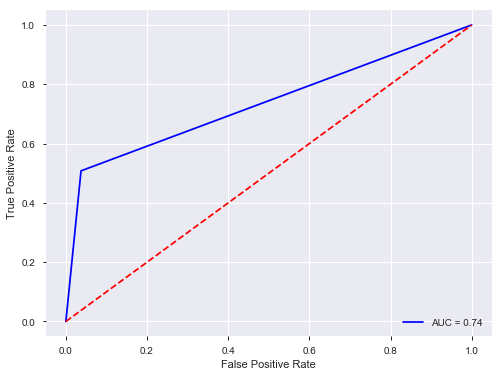

In [165]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)
area = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', label = 'AUC = %0.2f' % area)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Finding Threshold

In [166]:
predicted_proba_rf = clf_rf.predict_proba(x_train)

In [167]:
print(predicted_proba_rf[:5,1])

[0.1324636  0.06193397 0.10174884 0.06868263 0.10539982]


In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
threshold_df            =  pd.DataFrame()  
threshold_df['Actual']  = y_train
threshold_df.dropna(inplace = True)

In [170]:
threshold_values = np.arange(0,0.2,0.02)

cutoff_df        = pd.DataFrame()

for i in range(len(threshold_values)):
    
    threshold                   = threshold_values[i]
    threshold_df['Probability'] = predicted_proba_rf[:,1]
    threshold_df['pred']        = threshold_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
    cm                          = confusion_matrix(threshold_df['Actual'].astype('int'),\
                                                   threshold_df['pred'])
    precision                   = np.diag(cm) / np.sum(cm, axis = 0)
    recall                      = np.diag(cm) / np.sum(cm, axis = 1) 
    accuracy_ratio              = ((cm[0,0] + cm[1,1]) * 100) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    #auroc                       = 
    recall_positive             = recall[1]
    precision_positive          = precision[1]
    cutoff_df_ind               = pd.DataFrame({'Threshold': threshold, 'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
    print(cutoff_df_ind)
    print(cm)
    cutoff_df.append(cutoff_df_ind)  
print(cutoff_df.head())

   Threshold  Recall  Precision  Accuracy Ratio
0        0.0     1.0   0.148998        14.89978
[[   0 7345]
 [   0 1286]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.02  0.998445   0.173233       28.976944
[[1217 6128]
 [   2 1284]]
   Threshold   Recall  Precision  Accuracy Ratio
0       0.04  0.98367   0.220575       47.966632
[[2875 4470]
 [  21 1265]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.06  0.962675   0.266008       59.865601
[[3929 3416]
 [  48 1238]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.08  0.908243   0.380952       76.642336
[[5447 1898]
 [ 118 1168]]
   Threshold    Recall  Precision  Accuracy Ratio
0        0.1  0.877916   0.462895       83.003128
[[6035 1310]
 [ 157 1129]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.12  0.856143   0.515933       85.888078
[[6312 1033]
 [ 185 1101]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.14  0.847589   0.527845       86.432627
[[6370  975]
 [ 1

{'fpr': 0.13955071477195372,
 'tpr': 0.8561430793157077,
 'threshold': 0.12217298856988924}

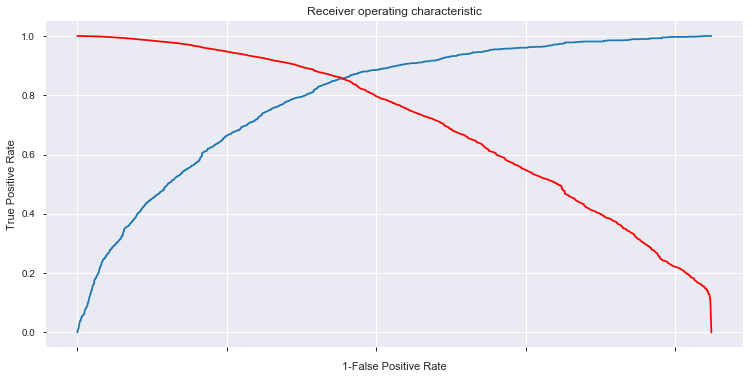

In [171]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, threshold_df['Probability'], \
                                         drop_intermediate = True )
get_youdens_j_cutoff(fpr, tpr, thresholds)  

## There is an increase in the AUC


Threshold is 0.100 

[[ 543   79]
 [ 594 2483]]


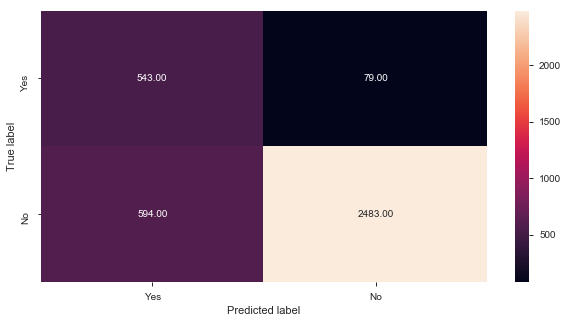

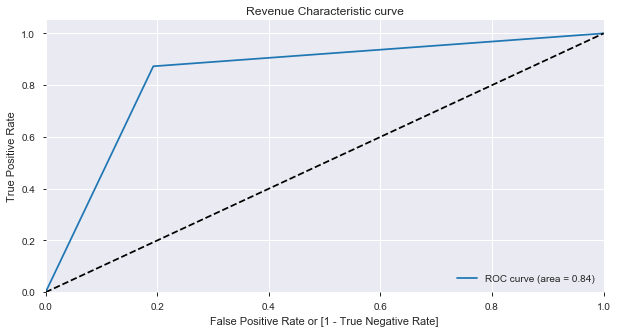

   Threshold    Recall  Precision  Accuracy Ratio
0        0.1  0.806955   0.969165       81.805893


In [172]:
predicted_proba_test              = clf_rf.predict_proba(x_test)
threshold__test_df                =  pd.DataFrame()  
threshold__test_df ['Actual']     =  y_test
threshold__test_df.dropna(inplace = True)
threshold_values                  = np.arange(0.1,0.12,0.02)
cutoff_df                         = pd.DataFrame()

for i in range(len(threshold_values)):
    
    threshold                         = threshold_values[i]
    print("\nThreshold is %0.3f" %threshold,"\n")
    threshold__test_df['Probability'] = predicted_proba_test[:,1]
    threshold__test_df['pred']        =  threshold__test_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
    cm                                = confusion_matrix(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'],[1,0])
    print(cm)
    draw_cm(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'])
    draw_roc(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred']) 
    precision                         = np.diag(cm) / np.sum(cm, axis = 0)
    recall                            = np.diag(cm) / np.sum(cm, axis = 1) 
    accuracy_ratio                    = ((cm[0,0] + cm[1,1]) * 100) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    recall_positive                   = recall[1]
    precision_positive                = precision[1]
    cutoff_df_ind                     = pd.DataFrame({'Threshold': threshold, 'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
    print(cutoff_df_ind)

    cutoff_df.append(cutoff_df_ind)  

## VARIABLE IMPORTANCE PLOTS

In [173]:
varImp_rf   = pd.DataFrame({'Feature_names' :feature_names,\
                            'Importances' : clf_rf.feature_importances_})
varImp_rf.sort_values('Importances', ascending = False) 

Feature_names  Importances
8                PageValues     0.790284
7                 ExitRates     0.064410
5   ProductRelated_Duration     0.036861
10                    Month     0.031055
4            ProductRelated     0.029231
6               BounceRates     0.019226
13              VisitorType     0.013160
1   Administrative_Duration     0.009084
0            Administrative     0.005287
3    Informational_Duration     0.000998
12              TrafficType     0.000270
14                  Weekend     0.000134
2             Informational     0.000000
9                SpecialDay     0.000000
11         OperatingSystems     0.000000

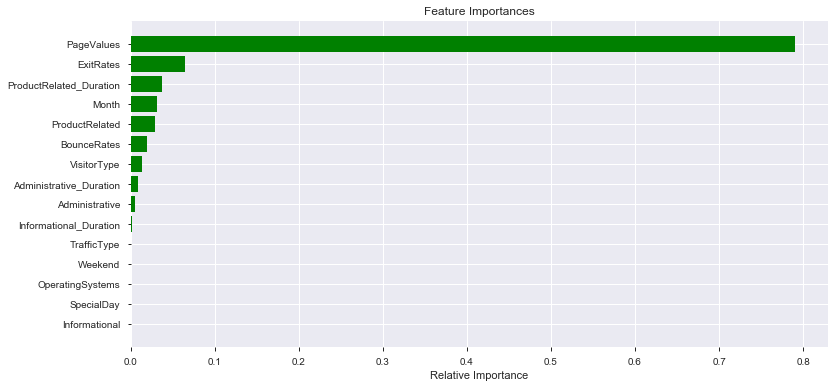

In [174]:
importances = clf_rf.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# NAIVE BAYES

In [175]:
X=data.iloc[:,:15]
y=data.iloc[:,15]
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(12330, 15)
(12330,)


## TRAIN/TEST SPLIT

In [176]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [177]:
x_train.head()

Administrative  Administrative_Duration  Informational  \
11332               1                 7.125000              6   
12071               0                 0.000000              0   
10023               0                 0.000000              0   
6771                9               449.816667              0   
4283                0                 0.000000              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
11332             1043.928571              73              3585.177579   
12071                0.000000              12               157.000000   
10023                0.000000              37               638.250000   
6771                 0.000000              17               200.950000   
4283                 6.000000              13              2782.750000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
11332     0.008175   0.024452         0.0         0.0      7   
12071     0.008333   0.033333         0.0         0.0      7   
10023     0.005556   0.016667         0.0         0.0      7   
6771      0.000000   0.024603         0.0         0.0      9   
4283      0.000000   0.005128         0.0         0.4      6   

       OperatingSystems  TrafficType  VisitorType  Weekend  
11332                 3            2            2        0  
12071                 3            1            2        0  
10023                 2            1            2        0  
6771                  2            2            2        0  
4283                  2            2            0        0

In [178]:
y_train.head()

11332    0
12071    0
10023    1
6771     0
4283     0
Name: Revenue, dtype: int64

In [179]:
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [180]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [181]:
y_pred_nb=NB.predict(x_test)

In [182]:
y_pred_nb

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [183]:
NB.predict_proba(x_test)

array([[9.66184076e-01, 3.38159241e-02],
       [3.44215403e-04, 9.99655785e-01],
       [8.46427828e-01, 1.53572172e-01],
       ...,
       [9.81857655e-01, 1.81423451e-02],
       [9.90267379e-01, 9.73262084e-03],
       [9.93668306e-01, 6.33169430e-03]])

In [184]:
print(accuracy_score(y_test,y_pred_nb)*100)

84.07677750743444


In [185]:
print(precision_score(y_test,y_pred_nb)*100)

52.6742301458671


In [186]:
print(recall_score(y_test,y_pred_nb)*100)

52.2508038585209


In [187]:
print(f1_score(y_test,y_pred_nb)*100)

52.46166263115416


In [188]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3077
           1       0.53      0.52      0.52       622

   micro avg       0.84      0.84      0.84      3699
   macro avg       0.72      0.71      0.71      3699
weighted avg       0.84      0.84      0.84      3699



[[2785  292]
 [ 297  325]]


<Figure size 720x576 with 0 Axes>

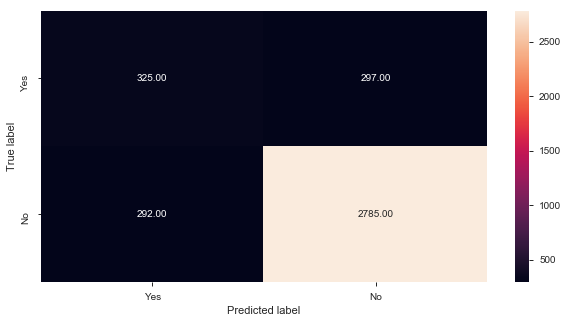

In [189]:
print(confusion_matrix(y_test,y_pred_nb))
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test,y_pred_nb)

draw_cm(y_test, y_pred_nb)

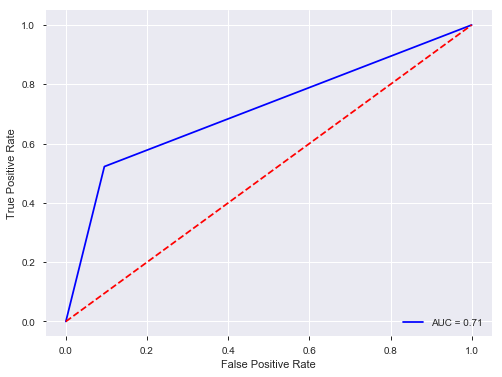

In [190]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_nb)
area = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', label = 'AUC = %0.2f' % area)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LOGISTIC REGRESSION

In [191]:
df=data

In [192]:
df.groupby(data['VisitorType']).sum()

Administrative  Administrative_Duration  Informational  \
VisitorType                                                           
0                      4323            155697.766959            565   
1                       125              5329.125000             15   
2                     24098            835466.575991           5629   

             Informational_Duration  ProductRelated  ProductRelated_Duration  \
VisitorType                                                                    
0                      32588.278334           30585             1.078050e+06   
1                        993.266667            1060             4.848441e+04   
2                     391463.121448          359604             1.360469e+07   

             BounceRates   ExitRates    PageValues  SpecialDay  Month  \
VisitorType                                                             
0               8.912404   35.032803  18248.085596        34.2   8590   
1               3.276866    5.384637   1546.304039         0.0    220   
2             261.430452  490.670156  52820.159812       723.2  54862   

             OperatingSystems  TrafficType  Weekend  Revenue  
VisitorType                                                   
0                        3435         6534      479      422  
1                         495         1163        7       16  
2                       22259        42481     2382     1470

In [193]:
df.groupby('Revenue').sum()

Administrative  Administrative_Duration  Informational  \
Revenue                                                           
0                 22071             768519.43860           4709   
1                  6475             227974.02935           1500   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
Revenue                                                                    
0                 315122.064399          299264             1.115141e+07   
1                 109922.602050           91985             3.579808e+06   

         BounceRates   ExitRates    PageValues  SpecialDay  Month  \
Revenue                                                             
0         263.856194  493.776335  20593.848732       713.2  52972   
1           9.763527   37.311261  52020.700715        44.2  10700   

         OperatingSystems  TrafficType  VisitorType  Weekend  
Revenue                                                       
0                   22196        42505        18231     2369  
1                    3993         7673         2956      499

In [194]:
df.groupby(data['TrafficType']).sum()

Administrative  Administrative_Duration  Informational  \
TrafficType                                                           
1                      4682            161095.095001            921   
2                     11307            414574.692087           2893   
3                      3698            115478.857271            616   
4                      2511             80457.639571            533   
5                       906             27783.210000            123   
6                       903             30964.854730            201   
7                       116              3413.583929             21   
8                       987             35556.195076            171   
9                        82              2847.333333             14   
10                     1051             34435.635121            237   
11                      435             15440.956565             92   
12                        0                 0.000000              0   
13                     1317             50069.221538            274   
14                       44              3602.920635             28   
15                       52              2666.083333             16   
16                        9               887.766667              0   
17                        0                 0.000000              0   
18                       21               721.400000              3   
19                       24               682.931818              5   
20                      401             15815.091274             61   

             Informational_Duration  ProductRelated  ProductRelated_Duration  \
TrafficType                                                                    
1                      57401.305833           78232             3.024618e+06   
2                     215515.788078          149184             5.704926e+06   
3                      39689.987693           52953             1.831939e+06   
4                      32726.567143           30494             1.057182e+06   
5                       4980.650000            4650             1.930061e+05   
6                      12888.131830           13146             5.063456e+05   
7                       1209.900000            1167             4.140050e+04   
8                      14152.980953            8960             3.719797e+05   
9                       1489.500000             619             2.275525e+04   
10                     13681.608333           14800             5.662376e+05   
11                      4969.483333            6227             2.220845e+05   
12                         0.000000               3             1.500000e+01   
13                     16988.075635           24315             9.348669e+05   
14                      2325.933333            1034             5.474607e+04   
15                       210.666667             613             2.033553e+04   
16                         0.000000              46             1.809800e+03   
17                         0.000000               4             6.000000e+01   
18                       266.000000             139             5.032261e+03   
19                      2133.000000             674             2.569325e+04   
20                      4415.087619            3989             1.461890e+05   

             BounceRates   ExitRates    PageValues  SpecialDay  Month  \
TrafficType                                                             
1              79.281019  136.539105   8468.386672       100.2  11841   
2              33.083556  103.269585  32494.983720       135.4  20023   
3              68.360285  117.203559   6722.420075       187.4  10717   
4              17.383330   38.650094   7529.087303       134.2   5860   
5               2.457156    7.716595   2005.247088        12.6   1512   
6               9.813934   20.162846   2253.852296        57.0   2404   
7               0.312896    0.992720    542.693810         2.0    216   
8               3.944242   10.16

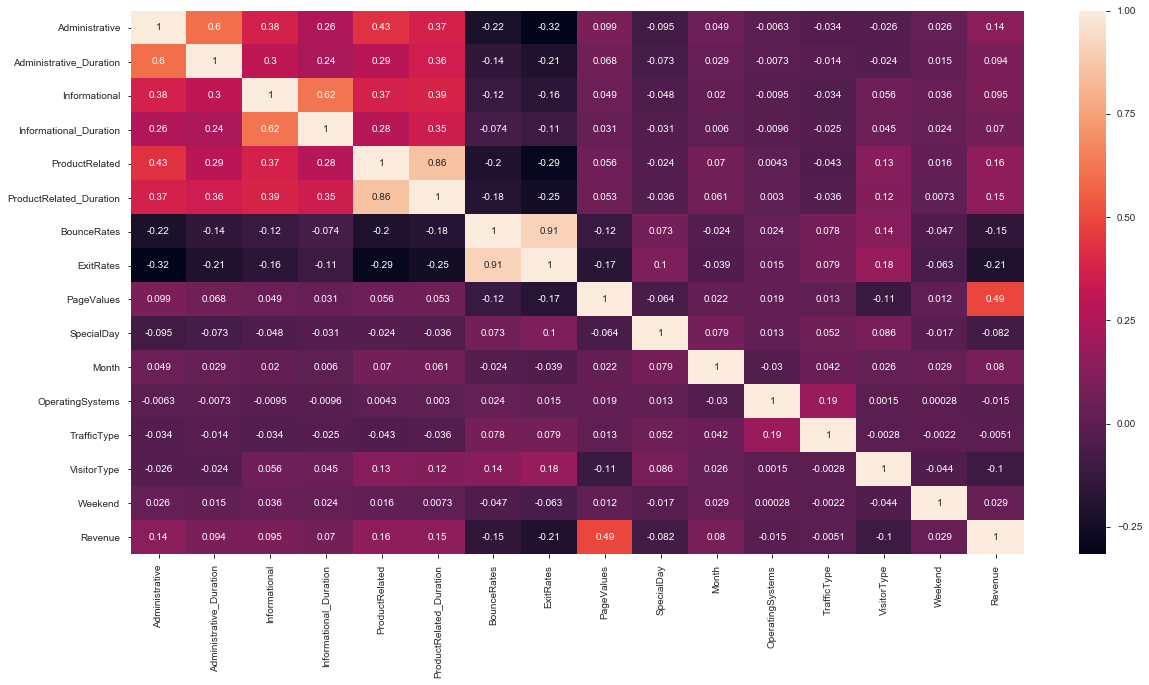

In [195]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [196]:
np.corrcoef(df)

array([[ 1.        , -0.11914463,  0.75573582, ..., -0.12270145,
        -0.1807258 ,  0.08223205],
       [-0.11914463,  1.        , -0.10994947, ...,  0.99878155,
         0.97492992,  0.9484479 ],
       [ 0.75573582, -0.10994947,  1.        , ..., -0.10593244,
        -0.17126845,  0.05895212],
       ...,
       [-0.12270145,  0.99878155, -0.10593244, ...,  1.        ,
         0.97445775,  0.95070343],
       [-0.1807258 ,  0.97492992, -0.17126845, ...,  0.97445775,
         1.        ,  0.91315404],
       [ 0.08223205,  0.9484479 ,  0.05895212, ...,  0.95070343,
         0.91315404,  1.        ]])

### The independent variables are linearly related to the log odds

### We need to check the assumption of Independent variables are linearly related to the log odds.

### One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

In [197]:
num_variables  = data.select_dtypes(include=[np.number]).columns.tolist()
num_variables.remove('Revenue') 
print(num_variables)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'TrafficType', 'VisitorType', 'Weekend']


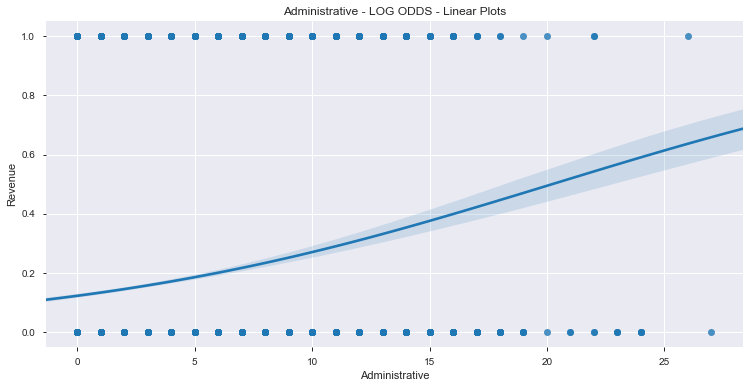

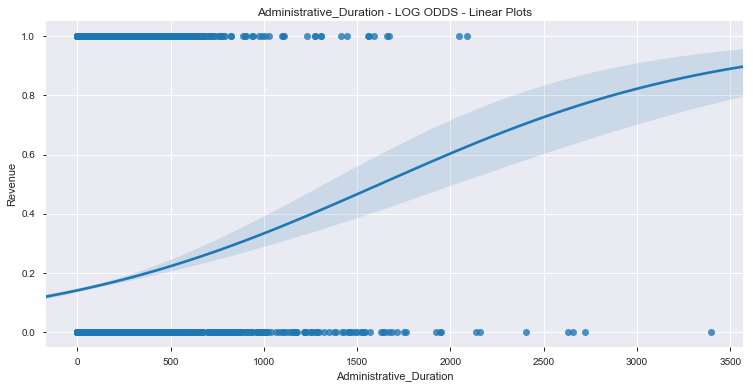

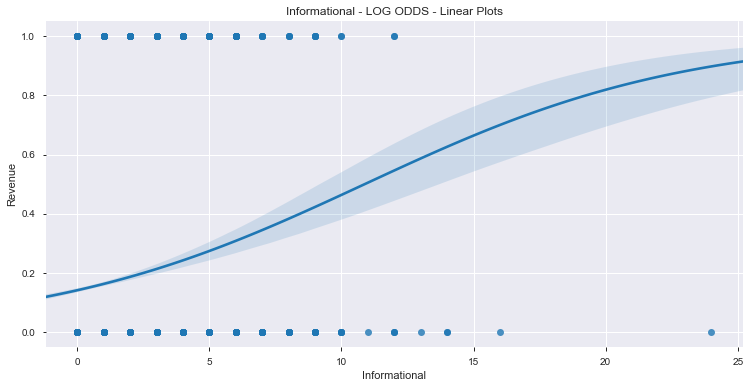

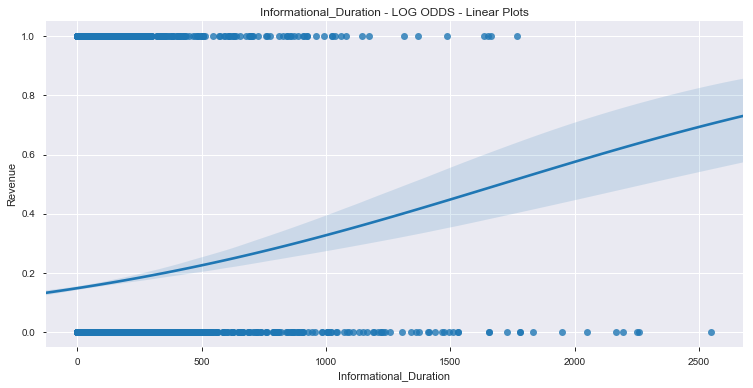

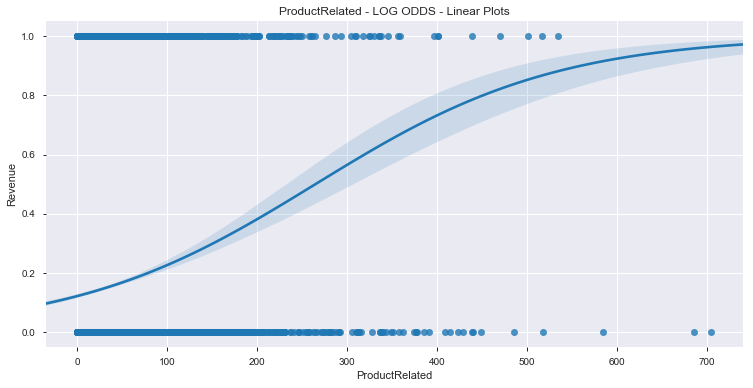

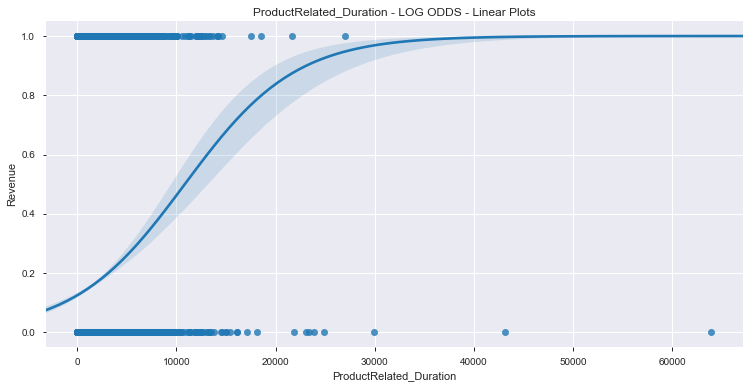

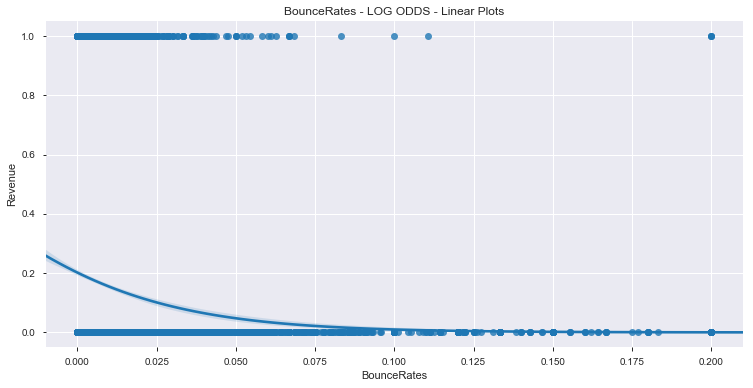

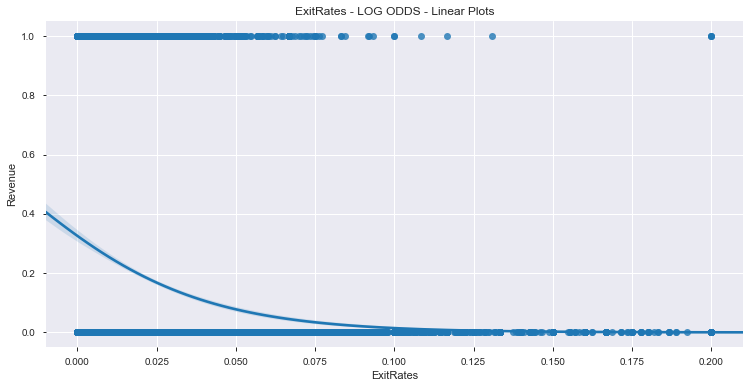

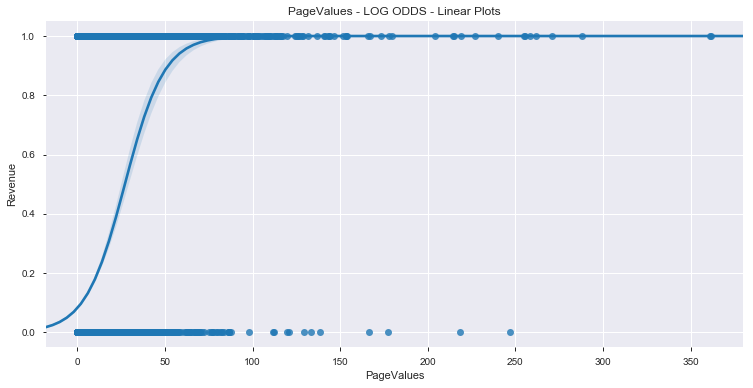

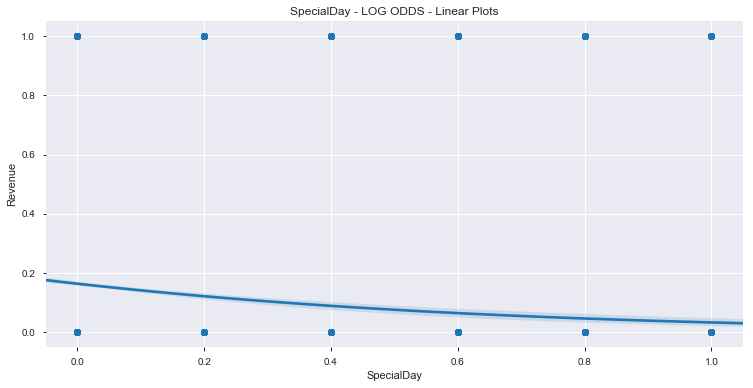

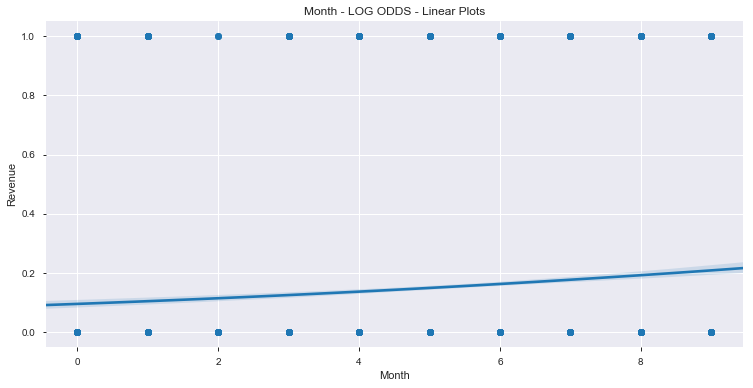

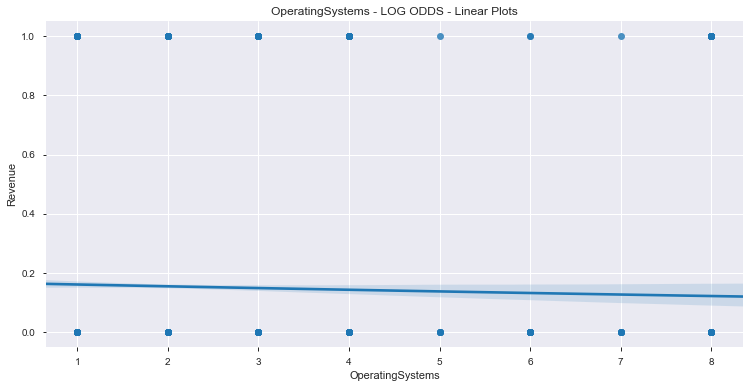

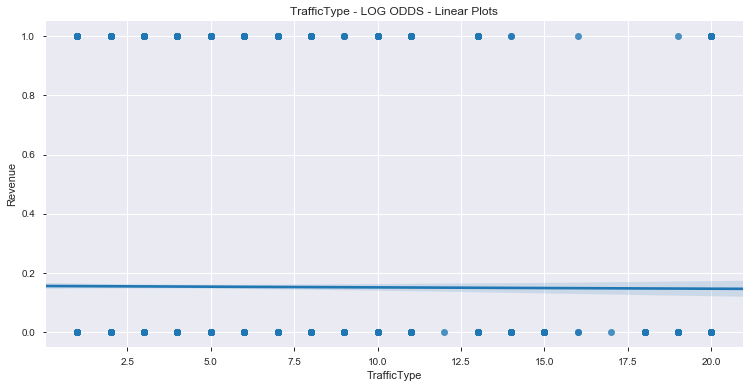

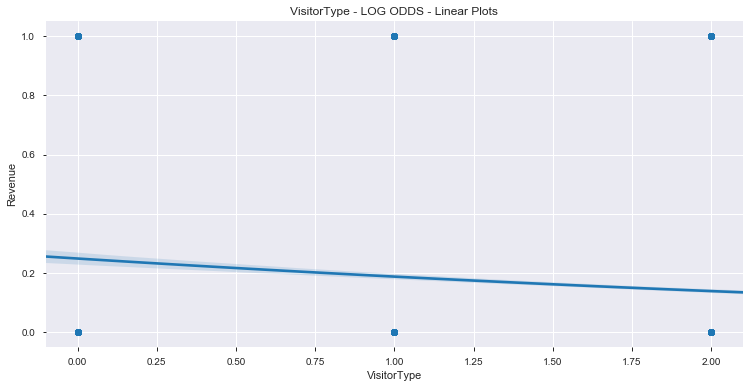

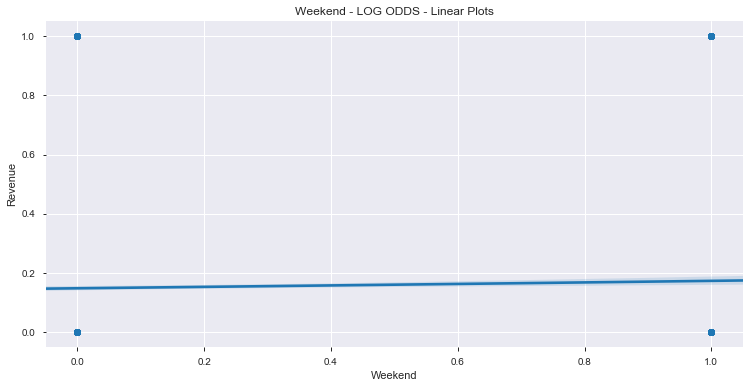

In [198]:
for i in range(len(num_variables)):
    title = num_variables[i] + ' - LOG ODDS - Linear Plots'
    xvar  = num_variables[i]
    check_linearity(xvar,df, title, 'Revenue')

### 'SpecialDay','Month','TrafficType','VisitorType','Weekend'
### we drop the variables which doesn't have S shaped graphs

In [199]:
X=df.drop('Revenue',axis=1)
y=df["Revenue"]

In [200]:
drop_list=['SpecialDay','Month','TrafficType','VisitorType','Weekend']
x1=X.drop(drop_list,axis=1)

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.3, random_state=50)

In [202]:
logit = sm.Logit( Y_train, sm.add_constant( X_train ) )
lg    = logit.fit()

Optimization terminated successfully.
         Current function value: 0.300042
         Iterations 9


In [203]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 8631
Model:                          Logit   Df Residuals:                     8620
Method:                           MLE   Df Model:                           10
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                  0.3037
Time:                        19:57:52   Log-Likelihood:                -2589.7
converged:                       True   LL-Null:                       -3719.4
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9001      0.124    -15.306      0.000      -2.143      -1.657
Administrative              0.0061      0.013      0.471      0.638      -0.019       0.032
Administrative_Duration  6.367e-05      0.000      0.277      0.781      -0.000       0.001
Informational               0.0175      0.032      0.553      0.580      -0.045       0.080
Informational_Duration     -0.0001      0.000     -0.530      0.596      -0.001       0.000
ProductRelated              0.0030      0.001      2.251      0.024       0.000       0.006
ProductRelated_Duration  6.601e-05   3.33e-05      1.980      0.048    6.55e-07       0.000
BounceRates                -7.8394      4.129     -1.899      0.058     -15.932       0.253
ExitRates                 -16.2566      2.755     -5.900      0.000     -21.657     -10.856
PageValues                  0.0811      0.003     28.545      0.000       0.076       0.087
OperatingSystems           -0.0826      0.044     -1.876      0.061      -0.169       0.004
===========================================================================================
"""

In [204]:
significant_vars = get_significant_vars( lg, sig_level = 0.05 )
print(significant_vars)

['const', 'ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues']


**Observation**

The following variables are significant at 5 % level of significance:

| SlNo | Significant variable |                      | 
| ---- | -------------------- | -------------------- |   
| 1 | ProductRelated | Number of product related pages visited by the user | 
| 2 | ProductRelated_Duration | Time spent on Product related pages by the user | 
| 3 | ExitRates | Average exit rate of the pages visited by the user | 
| 4 | PageValues | Average page value of the pages visited by the user | 



## GET ODDS RATIO

In [205]:
drop_vars = list(X.columns)
print(type(drop_vars))
significant_vars.remove('const')

<class 'list'>


In [206]:
print(significant_vars)
print(drop_vars)

['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues']
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'TrafficType', 'VisitorType', 'Weekend']


In [207]:
for i in range(len(significant_vars)):
    print(significant_vars[i])
    rm = significant_vars[i]
    drop_vars.remove(str(rm))

print(drop_vars)

ProductRelated
ProductRelated_Duration
ExitRates
PageValues
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'BounceRates', 'SpecialDay', 'Month', 'OperatingSystems', 'TrafficType', 'VisitorType', 'Weekend']


In [208]:
print(np.exp(lg.params))
print(type(np.exp(lg.params)))

const                      1.495552e-01
Administrative             1.006118e+00
Administrative_Duration    1.000064e+00
Informational              1.017647e+00
Informational_Duration     9.998601e-01
ProductRelated             1.003053e+00
ProductRelated_Duration    1.000066e+00
BounceRates                3.939083e-04
ExitRates                  8.706680e-08
PageValues                 1.084516e+00
OperatingSystems           9.206997e-01
dtype: float64
<class 'pandas.core.series.Series'>


In [209]:
drop_vars.append('const')

In [210]:
np.exp(lg.params).reindex(significant_vars).sort_values(ascending = False)
 

PageValues                 1.084516e+00
ProductRelated             1.003053e+00
ProductRelated_Duration    1.000066e+00
ExitRates                  8.706680e-08
dtype: float64

## Using VIF

In [211]:
X=df.drop('Revenue',axis=1)
y=df["Revenue"]

In [212]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)


In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[2.0434959088540228,
 2.118798189182117,
 1.7791492685247345,
 6.666567857261582,
 6.015330227721955,
 7.287920067762738,
 11.623539755919149,
 1.1357800973857173,
 1.1322148072943143,
 4.558617070730176,
 5.013995779182044,
 2.101260771310682,
 6.100075544377647,
 1.286863512917768]

In [214]:
train_out = calculate_vif(X) 

Iteration no.
1
[2.831871124891056, 2.0434959088540228, 2.118798189182117, 1.7791492685247345, 6.666567857261582, 6.015330227721955, 7.287920067762738, 11.623539755919149, 1.1357800973857173, 1.1322148072943143, 4.558617070730176, 5.013995779182044, 2.101260771310682, 6.100075544377647, 1.286863512917768]
Max VIF is for variable no.:
7
Iteration no.
2
[2.8047074997969452, 2.0431125977250666, 2.1186121622974055, 1.779132831190165, 6.5452060438770685, 6.007405344288559, 1.3386084291131481, 1.1254202834397449, 1.129017864788005, 4.481319343045296, 4.890481852767342, 2.0962225946261914, 5.3076225692027075, 1.2868541375252884]
Max VIF is for variable no.:
4
Iteration no.
3
[2.584360217919299, 1.9678427319651428, 2.103658362597059, 1.7610446897695564, 1.9052927231179624, 1.3336878797445797, 1.125382094489842, 1.1280084294553911, 4.4772213260219536, 4.889419856460145, 2.0957423148307948, 5.2692932744833305, 1.2865846627243094]
Max VIF is for variable no.:
11
Iteration no.
4
[2.577732394806019

In [215]:
train_out.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated_Duration  BounceRates  PageValues  \
0                     0.0                 0.000000         0.20         0.0   
1                     0.0                64.000000         0.00         0.0   
2                     0.0                 0.000000         0.20         0.0   
3                     0.0                 2.666667         0.05         0.0   
4                     0.0               627.500000         0.02         0.0   

   SpecialDay  Month  OperatingSystems  TrafficType  Weekend  
0         0.0      2                 1            1        0  
1         0.0      2                 2            2        0  
2         0.0      2                 4            3        0  
3         0.0      2                 3            4        0  
4         0.0      2                 3            4        1

In [216]:
[variance_inflation_factor(train_out.values, j) for j in range(1,train_out.shape[1])]

[1.9659261504361343,
 2.0998887822364134,
 1.7608735123509467,
 1.8514485509962864,
 1.2728286094115198,
 1.1230202083599303,
 1.1210005085288508,
 3.7597534420656293,
 4.068096019450474,
 2.0879616294216463,
 1.283821573803289]

In [217]:
X=train_out
X.head()


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated_Duration  BounceRates  PageValues  \
0                     0.0                 0.000000         0.20         0.0   
1                     0.0                64.000000         0.00         0.0   
2                     0.0                 0.000000         0.20         0.0   
3                     0.0                 2.666667         0.05         0.0   
4                     0.0               627.500000         0.02         0.0   

   SpecialDay  Month  OperatingSystems  TrafficType  Weekend  
0         0.0      2                 1            1        0  
1         0.0      2                 2            2        0  
2         0.0      2                 4            3        0  
3         0.0      2                 3            4        0  
4         0.0      2                 3            4        1

In [218]:

lr=LogisticRegression()
lr_bag=BaggingClassifier(base_estimator=lr,n_estimators=25,random_state=1)
ablr=AdaBoostClassifier(base_estimator=lr_bag,n_estimators=50,random_state=1)


In [219]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc
kf=KFold(n_splits=3,shuffle=True,random_state=1)
for model,name in zip([lr,lr_bag,ablr],['LR','LR_bagging','ABLR']):
    roc_auc=[]
    for train,test in kf.split(X,y):
        X_train,X_test=X.iloc[train,:],X.iloc[test,:]
        Y_train,Y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        # cm=
        fpr,tpr, _=roc_curve(Y_test,Y_pred)
        roc_auc.append(auc(fpr,tpr))
    print("auc scores :%0.02f (+/- %0.05f) [%s]" %(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

auc scores :0.67 (+/- 0.00012) [LR]
auc scores :0.67 (+/- 0.00008) [LR_bagging]
auc scores :0.63 (+/- 0.00010) [ABLR]


In [220]:
predicted_train= lr.predict(X_train)


Training Data
[[6818  165]
 [ 795  442]]


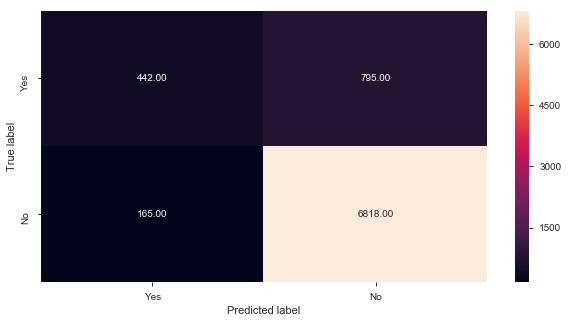

In [221]:

matrix             = confusion_matrix(Y_train, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(Y_train, predicted_train )



Testing Data
[[3378   61]
 [ 475  196]]


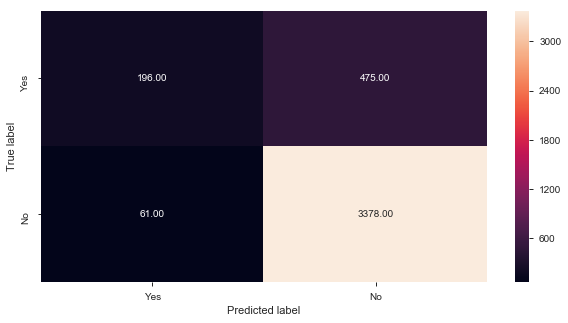

In [222]:
matrix             = confusion_matrix(Y_test,Y_pred)
print("\nTesting Data")
print(matrix)
draw_cm(Y_test,Y_pred )
    
#accuracy_train = clf.score(X_train, Y_train) 
#print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

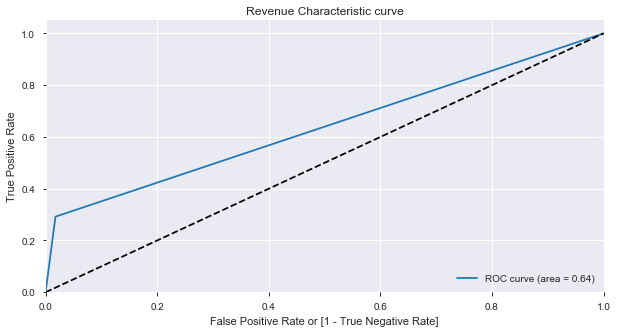

(array([0.        , 0.01773771, 1.        ]),
 array([0.        , 0.29210134, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [223]:


n_splits           =  10
random_state       =  0
scoring            = 'roc_auc'

kfold              =  KFold(n_splits = X_train.shape[0], shuffle = False, random_state = random_state)

auc_train          = cross_val_score(lr, X_train, Y_train,  scoring = scoring) 

draw_roc( Y_test,Y_pred)   

In [224]:
print(accuracy_score(Y_test,Y_pred)*100)

86.95863746958638


In [225]:
print(precision_score(Y_test,Y_pred)*100)

76.26459143968872


In [226]:
print(recall_score(Y_test,Y_pred)*100)

29.210134128166914


In [227]:
print(f1_score(Y_test,Y_pred)*100)

42.241379310344826


## Using chisquare

In [228]:
X=df.drop(['Revenue'],axis=1)
y=df["Revenue"]

In [229]:

kf=KFold(n_splits=3,shuffle=True,random_state=1)
for model,name in zip([lr,lr_bag,ablr],['LR','LR_bagging','ABLR']):
    roc_auc=[]
    for train,test in kf.split(X,y):
        X_train,X_test=X.iloc[train,:],X.iloc[test,:]
        Y_train,Y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        # cm=
        fpr,tpr, _=roc_curve(Y_test,Y_pred)
        roc_auc.append(auc(fpr,tpr))
    print("AUC scores :%0.02f (+/- %0.05f) [%s]" %(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

AUC scores :0.68 (+/- 0.00006) [LR]
AUC scores :0.68 (+/- 0.00005) [LR_bagging]
AUC scores :0.64 (+/- 0.00005) [ABLR]


# KNN

In [230]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [231]:
neighbors = np.arange(1,17)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [232]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

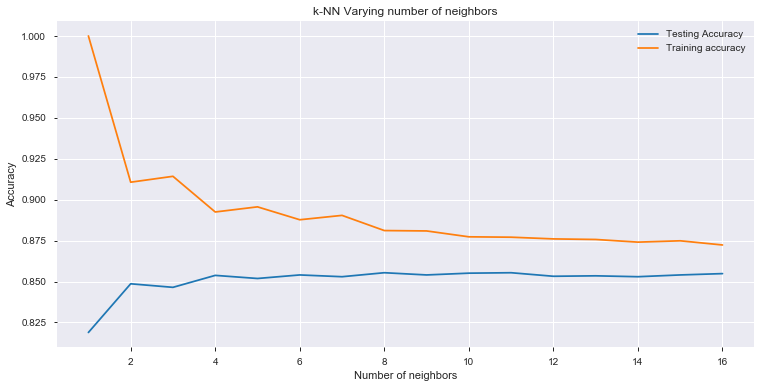

In [233]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [234]:
#Predict the response for train dataset
clf_knn= KNeighborsClassifier(n_neighbors= 8)
clf_knn.fit(x_train,y_train)
predicted_train = clf_knn.predict(x_train)


Training Data
[[7268   77]
 [ 949  337]]


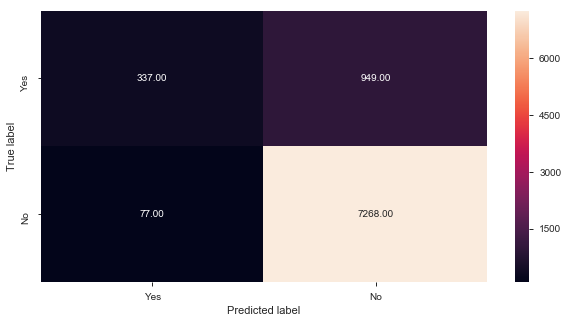

Training Accuracy: 100.000%


In [235]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(y_train, predicted_train )
    
accuracy_train = clf.score(x_train, y_train) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [236]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train)


Training data
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7345
           1       0.81      0.26      0.40      1286

   micro avg       0.88      0.88      0.88      8631
   macro avg       0.85      0.63      0.67      8631
weighted avg       0.87      0.88      0.85      8631




Training data


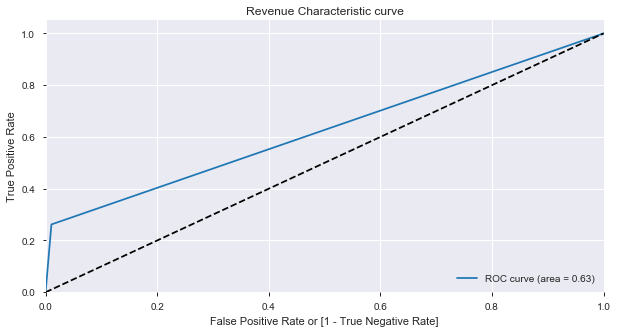

(array([0.        , 0.01048332, 1.        ]),
 array([0.        , 0.26205288, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [237]:
n_splits           =  10
random_state       =  0
scoring            = 'roc_auc'

kfold              =  KFold(n_splits = x_train.shape[0], shuffle = False, random_state = random_state)

auc_train          = cross_val_score(clf, x_train, y_train,  scoring = scoring) 
print("\nTraining data")
draw_roc( y_train, predicted_train)   

## Predict the response for test dataset

In [238]:

predicted_testing = clf_knn.predict(x_test)


Testing Data
[[3045   32]
 [ 503  119]]


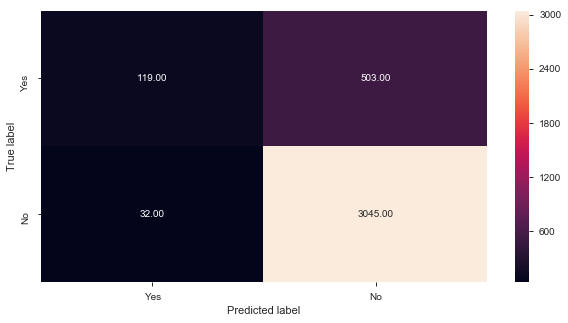

Testing Accuracy: 85.293%


In [239]:
matrix             = confusion_matrix(y_test, predicted_testing)
print("\nTesting Data")
print(matrix)
draw_cm(y_test, predicted_testing )
    
accuracy_train = clf.score(x_test, y_test) 
print("Testing Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [240]:
measures_test      = classification_report(y_test, predicted_testing) 
print("\nTesting data")
print(measures_test) 


Testing data
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3077
           1       0.79      0.19      0.31       622

   micro avg       0.86      0.86      0.86      3699
   macro avg       0.82      0.59      0.61      3699
weighted avg       0.85      0.86      0.82      3699




Testing  data


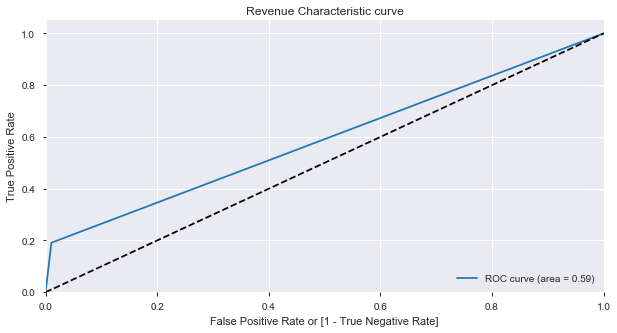

(array([0.        , 0.01039974, 1.        ]),
 array([0.        , 0.19131833, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [241]:
print("\nTesting  data")
draw_roc( y_test, predicted_testing)  

In [242]:

roc_auc_score(y_test,predicted_testing)

0.5904592939838884

## GridSearch

In [243]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [244]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [245]:
knn_cv.best_score_

0.8658556366585564

In [246]:
knn_cv.best_params_

{'n_neighbors': 10}

Thus a knn classifier with number of neighbors as 10 achieves the best score/accuracy of 0.8658 i.e about 86%

# SVM

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc,recall_score,precision_score,f1_score

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("online_shoppers_intention.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Month'] = labelencoder.fit_transform(data['Month'])
data['VisitorType'] = labelencoder.fit_transform(data['VisitorType'])
data['Weekend'] = labelencoder.fit_transform(data['Weekend'])
data['Revenue'] = labelencoder.fit_transform(data['Revenue'])

In [4]:
x=data.drop('Revenue',axis=1)
y=data.Revenue

In [5]:
sc=StandardScaler()
x=sc.fit_transform(x)

<Figure size 1800x1800 with 0 Axes>

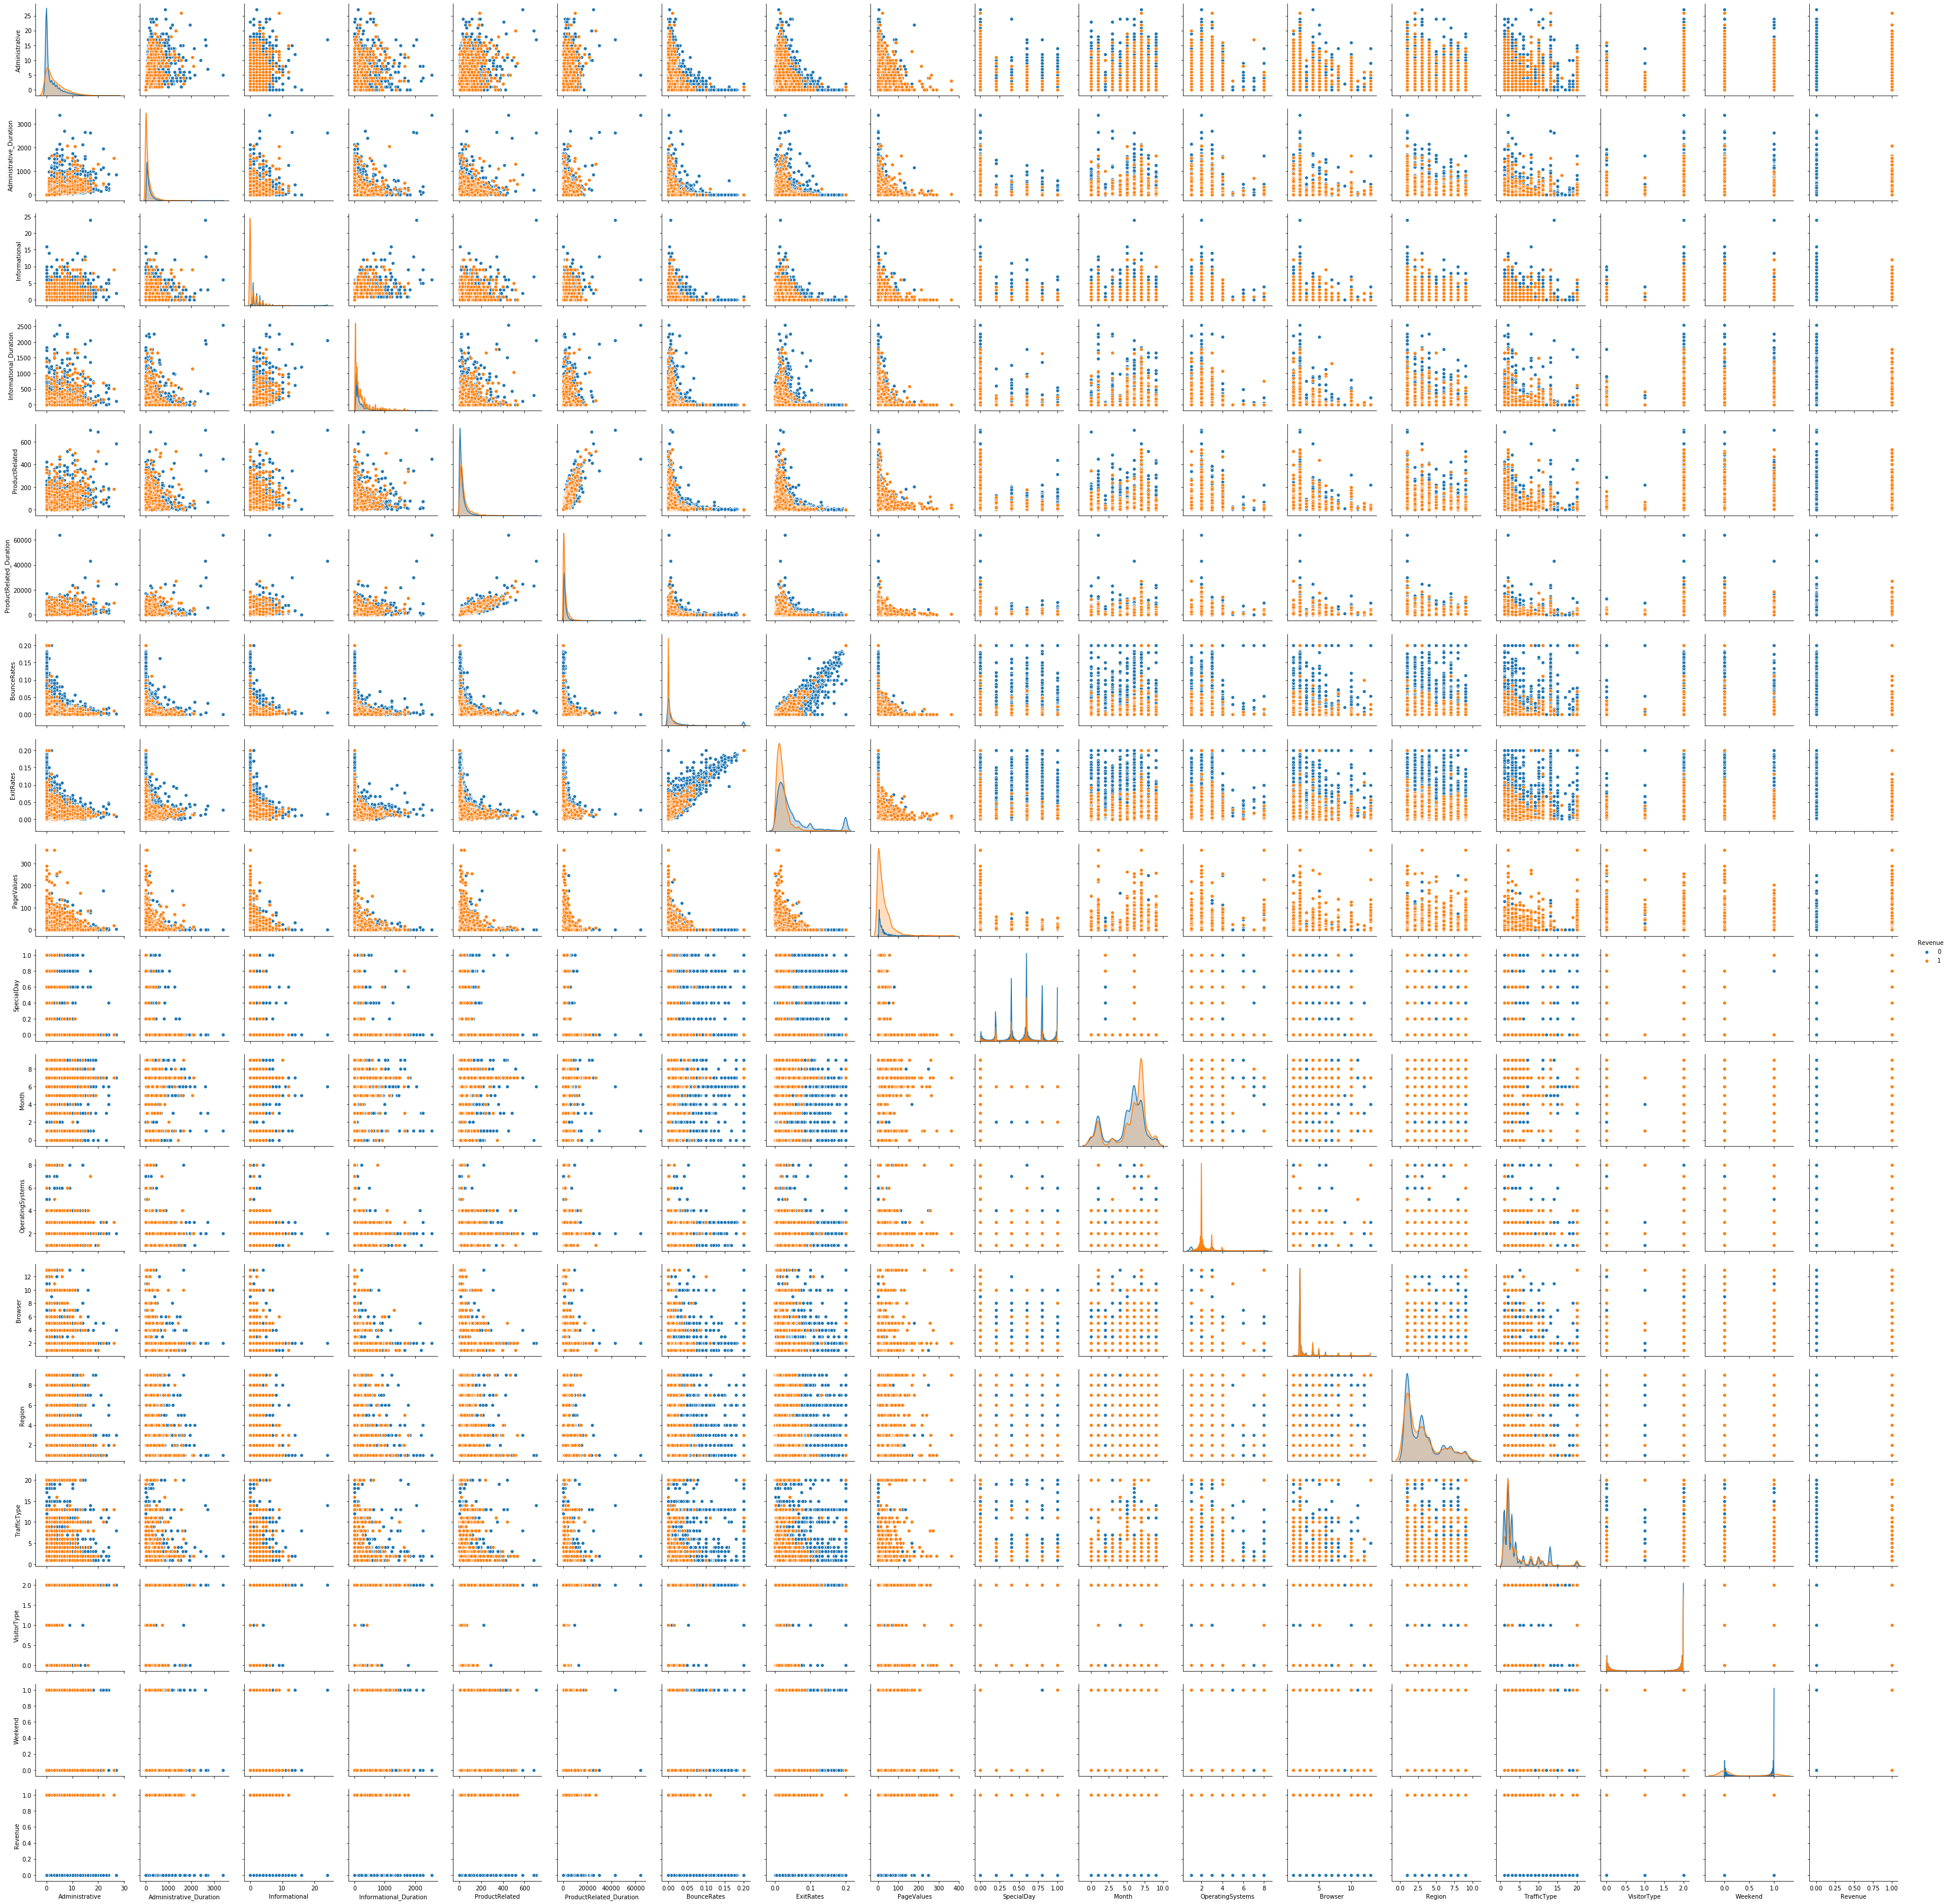

In [6]:
plt.figure(figsize=(25,25))
sns.pairplot(data,diag_kind='kde',hue='Revenue')

In [6]:
def draw_cm( actual, predicted ):
  
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    plt.figure(figsize=(10,5))
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()   

In [7]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
  
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Revenue Characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [12]:
svc=SVC(random_state=1).fit(x_train,y_train)

In [13]:
pred_train=svc.predict(x_train)

In [14]:
fpr,tpr,_=roc_curve(y_train,pred_train)
auc_=auc(fpr,tpr)
auc_

0.7452397725806931

[[7102  171]
 [ 660  698]]


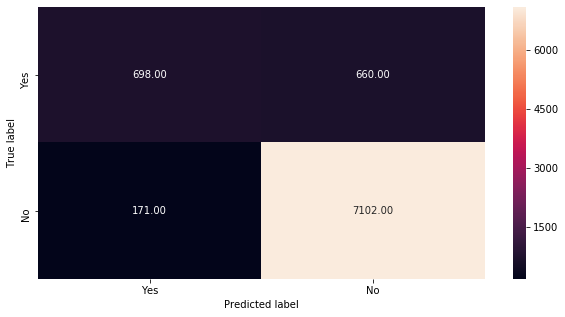

In [15]:
print(confusion_matrix(y_train,pred_train))
draw_cm(y_train,pred_train)


In [16]:
y_pred=svc.predict(x_test)

In [17]:
fpr,tpr,_=roc_curve(y_test,y_pred)
auc_=auc(fpr,tpr)
auc_

0.7167776206010567

In [18]:
f1_score(y_test,y_pred)

0.568868980963046

[[3060   89]
 [ 296  254]]


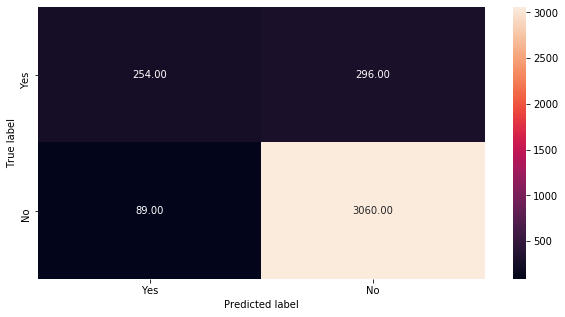

In [19]:
print(confusion_matrix(y_test,y_pred))
draw_cm(y_test,y_pred)


In [20]:
len(svc.support_vectors_)/len(data)*100


20.072992700729927

## 20 percentage of the data are support vector machines, the ideal percentage of support vectors should be less than 10%

In [44]:
svc1=SVC(C=10000,gamma=.01,random_state=1).fit(x_train,y_train)

In [45]:
pred_train1=svc1.predict(x_train)

In [46]:
fpr,tpr,_=roc_curve(y_train,pred_train1)
auc_=auc(fpr,tpr)
auc_

0.8699929551610887

[[7160  113]
 [ 332 1026]]


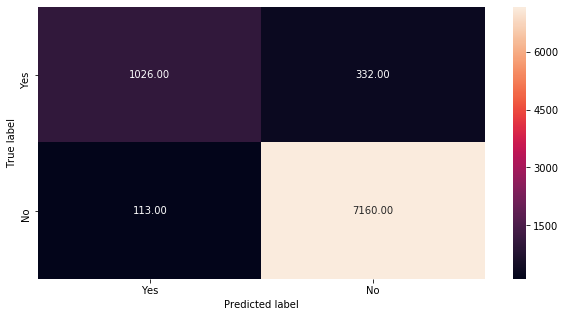

In [47]:
print(confusion_matrix(y_train,pred_train1))
draw_cm(y_train,pred_train1)

In [53]:
len(svc1.support_vectors_)/len(data)*100


17.21816707218167

In [48]:
f1_score(y_train,pred_train1)

0.8217861433720465

## 17.21 percentage of data are support vectors which is little over 10% which is likely indicator to tell whether the model is better fit

In [49]:
y_pred1=svc1.predict(x_test)

In [50]:
fpr,tpr,_=roc_curve(y_test,y_pred1)
auc_=auc(fpr,tpr)
auc_

0.742098212996911

[[2979  170]
 [ 254  296]]


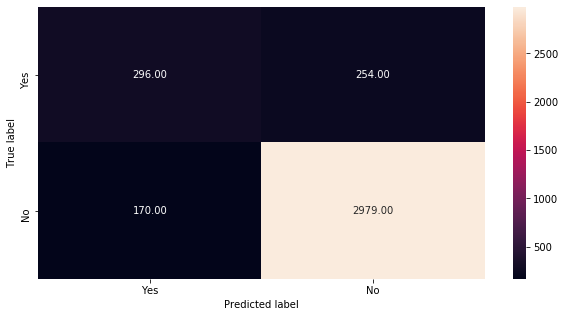

In [51]:
print(confusion_matrix(y_test,y_pred1))
draw_cm(y_test,y_pred1)


In [52]:
f1_score(y_test,y_pred1)

0.5826771653543308

## Weights


In [54]:
weights={}
for i in range(data.Revenue.nunique()):
    weights[i]=data.Revenue.value_counts()[i]/data.Revenue.value_counts().sum()
weights

{0: 0.8452554744525548, 1: 0.15474452554744525}

In [55]:
svc2=SVC(C=1000,gamma=.065,class_weight=weights,random_state=1).fit(x_train,y_train)

In [56]:
pred_train2=svc2.predict(x_train)

In [57]:
fpr,tpr,_=roc_curve(y_train,pred_train2)
auc_=auc(fpr,tpr)
auc_

0.8877025036818851

[[7273    0]
 [ 305 1053]]


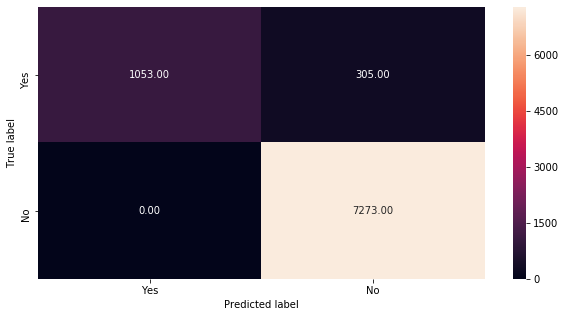

In [58]:
print(confusion_matrix(y_train,pred_train2))
draw_cm(y_train,pred_train2)

In [59]:
len(svc2.support_vectors_)/len(data)*100


18.580697485806972

## 18.58 percentage of data are support vectors which is little over 10% which is likely indicator to tell whether the model is better fit

In [60]:
y_pred2=svc2.predict(x_test)

In [61]:
fpr,tpr,_=roc_curve(y_test,y_pred2)
auc_=auc(fpr,tpr)
auc_

0.7125029590923526

[[2993  156]
 [ 289  261]]


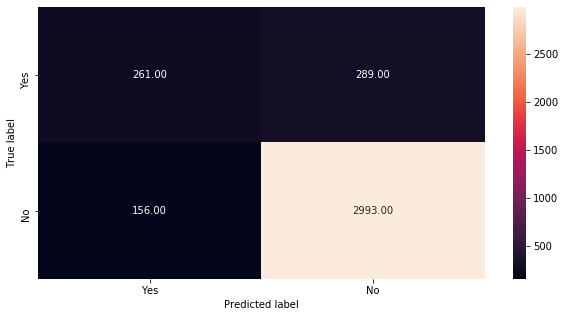

In [62]:
print(confusion_matrix(y_test,y_pred2))
draw_cm(y_test,y_pred2)

In [63]:
f1_score(y_test,y_pred2)

0.5398138572905895

In [64]:
y_pred2=svc2.predict(x_test)

In [65]:
fpr,tpr,_=roc_curve(y_test,y_pred2)
auc_=auc(fpr,tpr)
auc_

0.7125029590923526

[[2993  156]
 [ 289  261]]


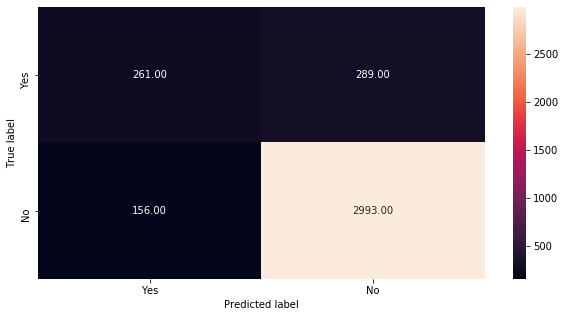

In [66]:
print(confusion_matrix(y_test,y_pred2))
draw_cm(y_test,y_pred2)

In [67]:
f1_score(y_test,y_pred2)

0.5398138572905895

['Administrative' 'Administrative_Duration' 'Informational'
 'Informational_Duration' 'ProductRelated' 'ProductRelated_Duration'
 'BounceRates' 'ExitRates' 'PageValues' 'SpecialDay' 'Month'
 'OperatingSystems' 'Browser' 'Region' 'TrafficType' 'VisitorType'
 'Weekend']


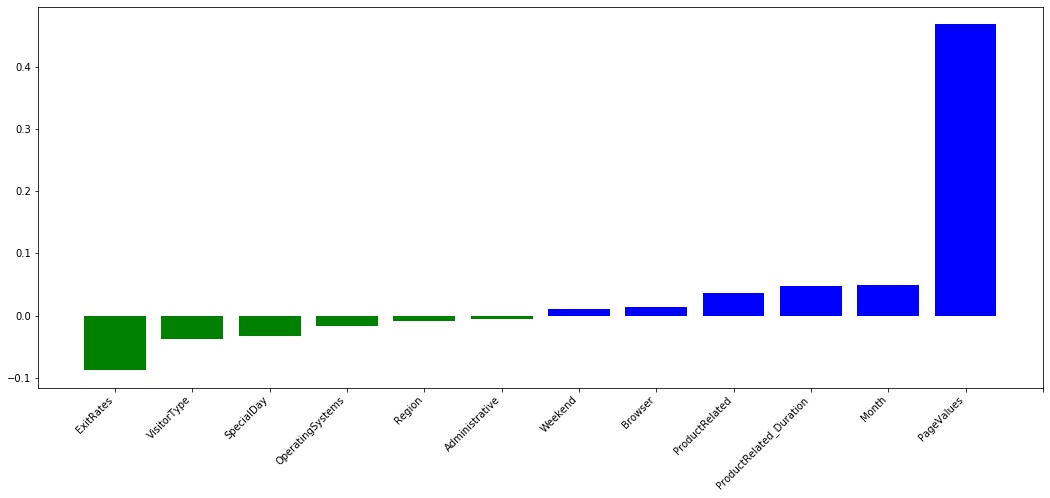

In [72]:
def feature_plot(classifier, feature_names, top_features=6):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(data.drop(['Revenue'], axis = 1).columns.values)

trainedsvm = LinearSVC().fit(x, y)
feature_plot(trainedsvm, data.drop(['Revenue'], axis = 1).columns.values)

In [79]:
coef=trainedsvm.coef_.ravel()
features=data.drop(['Revenue'], axis = 1).columns.values
features_coef=pd.DataFrame()
features_coef['features']=features
features_coef['feature_importance']=coef
features_coef

features  feature_importance
0            Administrative           -0.005635
1   Administrative_Duration           -0.003272
2             Informational            0.005378
3    Informational_Duration            0.006575
4            ProductRelated            0.036115
5   ProductRelated_Duration            0.048145
6               BounceRates            0.003793
7                 ExitRates           -0.088127
8                PageValues            0.468242
9                SpecialDay           -0.032442
10                    Month            0.048433
11         OperatingSystems           -0.016080
12                  Browser            0.012954
13                   Region           -0.008524
14              TrafficType            0.006263
15              VisitorType           -0.037594
16                  Weekend            0.009863